In [2]:
import time
import json
from optparse import OptionParser
import sys
import os
cwd = os.getcwd()
moduledir = cwd+'/../modules/'
if moduledir not in sys.path:
    sys.path.append(moduledir)
from analysis_process import *

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('figure', dpi=300)


In [3]:
configFile = "/data/user/ssarkar/github_repo/DiMuonAnalysis/config/mc_config.json"
with open(configFile) as f:
        config = json.load(f)
asimov = True


In [4]:
#******* Common Args *******
xsdir  = config["XSDir"]
nsqdir = config["NSQDir"]
charm_xs = config["CharmXS"]
band = ["UP", "DN"]

#Initialize placeholder list of analysis/process objects
sig_holder = []
bkg_holder = []
sigsys_holder = []
bkgsys_holder = []

nom_dict = config["Input"]["Nominal"]


In [5]:
#============== Process CCDIS single Muon ============================
infiles = [nom_dict["mc_loc"]+f for f in nom_dict["ccdis_files"]]
ascores = [nom_dict["score_loc"]+f for f in nom_dict["ccdis_Ascores"]]
bscores = [nom_dict["score_loc"]+f for f in nom_dict["ccdis_Bscores"]]
norm = config["Normalization"]["Nominal"]["ccdis"]

print ("---------- Process [1/9] : NuMu CCDIS single muon background")
# Process Nominal
nom_ccdis = process_dataset(infiles, ascores, bscores, 'ccdis', norm, xsdir, nsqdir)

# Process Weight based systematics
for w in config["WeightSystematics"]:
        for b in band:
                sysname = w+b
                print ("Processing weight systematics : ", sysname)
                sys = process_sys(infiles, norm, 'ccdis', sysname, xsdir, nsqdir)
                nom_ccdis.add_systematics_weight(sys[1], sysname)

bkg_holder.append(nom_ccdis)



---------- Process [1/9] : NuMu CCDIS single muon background
Processing 4 files... sit tight!
Processing /data/user/ssarkar/DiMuonSearch/MC/Nominal/11_Graph/AnalysisMC/transformed/CCA_928_scaled.h5
Processing /data/user/ssarkar/DiMuonSearch/MC/Nominal/11_Graph/AnalysisMC/transformed/CCA_988_scaled.h5
Processing /data/user/ssarkar/DiMuonSearch/MC/Nominal/11_Graph/AnalysisMC/transformed/CCA_989_scaled.h5
Processing /data/user/ssarkar/DiMuonSearch/MC/Nominal/11_Graph/AnalysisMC/transformed/CCA_999_scaled.h5
Processing files for building final arrays... Will take a while.
Done building arrays!
Processing weight systematics :  XSUP
Processing 4 files...
Processing /data/user/ssarkar/DiMuonSearch/MC/Nominal/11_Graph/AnalysisMC/transformed/CCA_928_scaled.h5
Processing /data/user/ssarkar/DiMuonSearch/MC/Nominal/11_Graph/AnalysisMC/transformed/CCA_988_scaled.h5
Processing /data/user/ssarkar/DiMuonSearch/MC/Nominal/11_Graph/AnalysisMC/transformed/CCA_989_scaled.h5
Processing /data/user/ssarkar/D

In [6]:
#============== Process Charm dimuon =================================
infiles = [nom_dict["mc_loc"]+f for f in nom_dict["charm_files"]]
ascores = [nom_dict["score_loc"]+f for f in nom_dict["charm_Ascores"]]
bscores = [nom_dict["score_loc"]+f for f in nom_dict["charm_Bscores"]]
norm = config["Normalization"]["Nominal"]["charm"]

print ("---------- Process [2/9] : NuMu Charm DiMuon signal")
# Process Nominal
nom_charm = process_dataset(infiles, ascores, bscores, 'charmNom', norm, xsdir, nsqdir, xsdata=charm_xs)

# Process Weight based systematics
for w in config["WeightSystematics"]:
        for b in band:
                sysname = w+b
                print ("Processing weight systematics : ", sysname)
                sys = process_sys(infiles, norm, 'charm', sysname, xsdir, nsqdir, xsdata=charm_xs)
                nom_charm.add_systematics_weight(sys[1], sysname)

sig_holder.append(nom_charm)



---------- Process [2/9] : NuMu Charm DiMuon signal
Processing 8 files... sit tight!
Processing /data/user/ssarkar/DiMuonSearch/MC/Nominal/11_Graph/AnalysisMC/transformed/CharmA_03_scaled.h5
Processing /data/user/ssarkar/DiMuonSearch/MC/Nominal/11_Graph/AnalysisMC/transformed/CharmA_04_scaled.h5
Processing /data/user/ssarkar/DiMuonSearch/MC/Nominal/11_Graph/AnalysisMC/transformed/CharmA_05_scaled.h5
Processing /data/user/ssarkar/DiMuonSearch/MC/Nominal/11_Graph/AnalysisMC/transformed/CharmA_06_scaled.h5
Processing /data/user/ssarkar/DiMuonSearch/MC/Nominal/11_Graph/AnalysisMC/transformed/CharmA_07_scaled.h5
Processing /data/user/ssarkar/DiMuonSearch/MC/Nominal/11_Graph/AnalysisMC/transformed/CharmA_08_scaled.h5
Processing /data/user/ssarkar/DiMuonSearch/MC/Nominal/11_Graph/AnalysisMC/transformed/CharmA_09_scaled.h5
Processing /data/user/ssarkar/DiMuonSearch/MC/Nominal/11_Graph/AnalysisMC/transformed/CharmA_10_scaled.h5
Processing files for building final arrays... Will take a while.
Do

Processing /data/user/ssarkar/DiMuonSearch/MC/Nominal/11_Graph/AnalysisMC/transformed/CharmA_09_scaled.h5
Processing /data/user/ssarkar/DiMuonSearch/MC/Nominal/11_Graph/AnalysisMC/transformed/CharmA_10_scaled.h5
Processing weight systematics :  AstroGammaUPmalization...
Processing 8 files...
Processing /data/user/ssarkar/DiMuonSearch/MC/Nominal/11_Graph/AnalysisMC/transformed/CharmA_03_scaled.h5
Processing /data/user/ssarkar/DiMuonSearch/MC/Nominal/11_Graph/AnalysisMC/transformed/CharmA_04_scaled.h5
Processing /data/user/ssarkar/DiMuonSearch/MC/Nominal/11_Graph/AnalysisMC/transformed/CharmA_05_scaled.h5
Processing /data/user/ssarkar/DiMuonSearch/MC/Nominal/11_Graph/AnalysisMC/transformed/CharmA_06_scaled.h5
Processing /data/user/ssarkar/DiMuonSearch/MC/Nominal/11_Graph/AnalysisMC/transformed/CharmA_07_scaled.h5
Processing /data/user/ssarkar/DiMuonSearch/MC/Nominal/11_Graph/AnalysisMC/transformed/CharmA_08_scaled.h5
Processing /data/user/ssarkar/DiMuonSearch/MC/Nominal/11_Graph/Analysis

In [7]:
#============== Process Trident dimuon ===============================
infiles = [nom_dict["mc_loc"]+f for f in nom_dict["trident_files"]]
ascores = [nom_dict["score_loc"]+f for f in nom_dict["trident_Ascores"]]
bscores = [nom_dict["score_loc"]+f for f in nom_dict["trident_Bscores"]]
norm = config["Normalization"]["Nominal"]["trident"]

print ("---------- Process [3/9] : NuMu Trident DiMuon signal")
nom_trident = process_dataset(infiles, ascores, bscores, 'trident', norm, xsdir, nsqdir)
sig_holder.append(nom_trident)



---------- Process [3/9] : NuMu Trident DiMuon signal
Processing 2 files... sit tight!
Processing /data/user/ssarkar/DiMuonSearch/MC/Nominal/11_Graph/AnalysisMC/transformed/NTPA_2_scaled.h5
Processing /data/user/ssarkar/DiMuonSearch/MC/Nominal/11_Graph/AnalysisMC/transformed/NTPA_3_scaled.h5
Processing files for building final arrays... Will take a while.
Done building arrays!


In [8]:
#============== Process NuTau Background =============================
bkg_dict = config["Input"]["AddBackground"]

infiles = [bkg_dict["mc_loc"] + bkg_dict["NuTau"]["file"]]
ascores = [bkg_dict["score_loc"] + bkg_dict["NuTau"]["Ascore"]]
bscores = [bkg_dict["score_loc"] + bkg_dict["NuTau"]["Bscore"]]
norm = config["Normalization"]["AddBackground"]["NuTau"]

print ("---------- Process [4/9] : NuTau CCDIS single muon background")
nutau_bkg = process_dataset(infiles, ascores, bscores, 'ccdis', norm, xsdir, nsqdir)
bkg_holder.append(nutau_bkg)

#============== Process NuE Background ===============================
infiles = [bkg_dict["mc_loc"] + bkg_dict["NuE"]["file"]]
ascores = [bkg_dict["score_loc"] + bkg_dict["NuE"]["Ascore"]]
bscores = [bkg_dict["score_loc"] + bkg_dict["NuE"]["Bscore"]]
norm = config["Normalization"]["AddBackground"]["NuE"]

print ("---------- Process [5/9] : NuE CCDIS single muon background")
nue_bkg = process_dataset(infiles, ascores, bscores, 'ccdis', norm, xsdir, nsqdir)
bkg_holder.append(nue_bkg)



---------- Process [4/9] : NuTau CCDIS single muon background
Processing 1 files... sit tight!
Processing /data/user/ssarkar/DiMuonSearch/MC/Background/transformed/NuTauA_1004_scaled.h5
Processing files for building final arrays... Will take a while.
Done building arrays!
---------- Process [5/9] : NuE CCDIS single muon background
Processing 1 files... sit tight!
Processing /data/user/ssarkar/DiMuonSearch/MC/Background/transformed/NuEA_1445_scaled.h5
Processing files for building final arrays... Will take a while.
Done building arrays!


In [9]:
#============== Process Corsika Background ===========================
infiles = [bkg_dict["mc_loc"] + bkg_dict["Corsika"]["file"]]
ascores = [bkg_dict["score_loc"] + bkg_dict["Corsika"]["Ascore"]]
bscores = [bkg_dict["score_loc"] + bkg_dict["Corsika"]["Bscore"]]
norm = config["Normalization"]["AddBackground"]["Corsika"]

print ("---------- Process [6/9] : CORSIKA Atmospheric muon background")
corsika = process_corsika(infiles, ascores, bscores, norm)
bkg_holder.append(corsika)



---------- Process [6/9] : CORSIKA Atmospheric muon background
Processing files for building final arrays... Will take a while.
Done building arrays!


In [10]:
#============== Process DOM eff. MC sets =============================
print ("---------- Process [7/9] : DOM Eff. MC sets signal + background")
sys_dict = config["Input"]["Systematics"]
floc = config["Input"]["Systematics"]["mc_loc"]
sloc = config["Input"]["Systematics"]["score_loc"]

# Signal Dom Eff.
norm = config["Normalization"]["Systematics"]["charm"]["dom"]
infiles = [floc+f for f in sys_dict["charm_files"]["dom"]]
ascores = [sloc+f for f in sys_dict["charm_Ascores"]["dom"]]
bscores = [sloc+f for f in sys_dict["charm_Bscores"]["dom"]]

for i in range(len(infiles)):
        f = [infiles[i]]
        a = [ascores[i]]
        b = [bscores[i]]
        proc = process_dataset(f, a, b, 'charmSys', norm, xsdir, nsqdir, xsdata=charm_xs)
        sigsys_holder.append(proc)

#Background DOM eff
infiles = [floc+f for f in sys_dict["ccdis_files"]["dom"]]
ascores = [sloc+f for f in sys_dict["ccdis_Ascores"]["dom"]]
bscores = [sloc+f for f in sys_dict["ccdis_Bscores"]["dom"]]
norm = config["Normalization"]["Systematics"]["ccdis"]["dom"]

for i in range(len(infiles)):
        f = [infiles[i]]
        a = [ascores[i]]
        b = [bscores[i]]
        n = norm[i]
        proc = process_dataset(f, a, b, 'ccdis', n, xsdir, nsqdir)
        bkgsys_holder.append(proc)



---------- Process [7/9] : DOM Eff. MC sets signal + background
Processing 1 files... sit tight!
Processing /data/user/ssarkar/DiMuonSearch/MC/Systematics/transformed/CharmDom1A_scaled.h5
Processing files for building final arrays... Will take a while.
Done building arrays!
Processing 1 files... sit tight!
Processing /data/user/ssarkar/DiMuonSearch/MC/Systematics/transformed/CharmDom2A_scaled.h5
Processing files for building final arrays... Will take a while.
Done building arrays!
Processing 1 files... sit tight!
Processing /data/user/ssarkar/DiMuonSearch/MC/Systematics/transformed/CCDom1A_1000_scaled.h5
Processing files for building final arrays... Will take a while.
Done building arrays!
Processing 1 files... sit tight!
Processing /data/user/ssarkar/DiMuonSearch/MC/Systematics/transformed/CCDom2A_1000_scaled.h5
Processing files for building final arrays... Will take a while.
Done building arrays!


In [11]:
#============== Process Hole Ice MC sets =============================
print ("---------- Process [8/9] : Hole Ice MC sets signal + background")
# Signal Hole Ice
norm = config["Normalization"]["Systematics"]["charm"]["hole"]
infiles = [floc+f for f in sys_dict["charm_files"]["hole"]]
ascores = [sloc+f for f in sys_dict["charm_Ascores"]["hole"]]
bscores = [sloc+f for f in sys_dict["charm_Bscores"]["hole"]]

for i in range(len(infiles)):
        f = [infiles[i]]
        a = [ascores[i]]
        b = [bscores[i]]
        proc = process_dataset(f, a, b, 'charmSys', norm, xsdir, nsqdir, xsdata=charm_xs)
        sigsys_holder.append(proc)

#Background Hole Ice
infiles = [floc+f for f in sys_dict["ccdis_files"]["hole"]]
ascores = [sloc+f for f in sys_dict["ccdis_Ascores"]["hole"]]
bscores = [sloc+f for f in sys_dict["ccdis_Bscores"]["hole"]]
norm = config["Normalization"]["Systematics"]["ccdis"]["hole"]

for i in range(len(infiles)):
        f = [infiles[i]]
        a = [ascores[i]]
        b = [bscores[i]]
        n = norm[i]
        proc = process_dataset(f, a, b, 'ccdis', n, xsdir, nsqdir)
        bkgsys_holder.append(proc)



---------- Process [8/9] : Hole Ice MC sets signal + background
Processing 1 files... sit tight!
Processing /data/user/ssarkar/DiMuonSearch/MC/Systematics/transformed/CharmHole1A_scaled.h5
Processing files for building final arrays... Will take a while.
Done building arrays!
Processing 1 files... sit tight!
Processing /data/user/ssarkar/DiMuonSearch/MC/Systematics/transformed/CharmHole2A_scaled.h5
Processing files for building final arrays... Will take a while.
Done building arrays!
Processing 1 files... sit tight!
Processing /data/user/ssarkar/DiMuonSearch/MC/Systematics/transformed/CCHole1A_997_scaled.h5
Processing files for building final arrays... Will take a while.
Done building arrays!
Processing 1 files... sit tight!
Processing /data/user/ssarkar/DiMuonSearch/MC/Systematics/transformed/CCHole2A_981_scaled.h5
Processing files for building final arrays... Will take a while.
Done building arrays!


In [12]:
#============== Process Bulk Ice MC sets =============================
print ("---------- Process [9/9] : Bulk Ice MC sets signal + background")
# Signal Bulk Ice
norm = config["Normalization"]["Systematics"]["charm"]["bulk"]
infiles = [floc+f for f in sys_dict["charm_files"]["bulk"]]
ascores = [sloc+f for f in sys_dict["charm_Ascores"]["bulk"]]
bscores = [sloc+f for f in sys_dict["charm_Bscores"]["bulk"]]

for i in range(len(infiles)):
        f = [infiles[i]]
        a = [ascores[i]]
        b = [bscores[i]]
        proc = process_dataset(f, a, b, 'charmSys', norm, xsdir, nsqdir, xsdata=charm_xs)
        sigsys_holder.append(proc)

# Background Bulk Ice
infiles = [floc + sys_dict["ccdis_files"]["bulk"][0]]
ascores = [sloc + sys_dict["ccdis_Ascores"]["bulk"][0]]
bscores = [sloc + sys_dict["ccdis_Bscores"]["bulk"][0]]
norm = config["Normalization"]["Systematics"]["ccdis"]["bulk"]

proc = process_dataset(infiles, ascores, bscores, 'ccdis', norm, xsdir, nsqdir)
bkgsys_holder.append(proc)



---------- Process [9/9] : Bulk Ice MC sets signal + background
Processing 1 files... sit tight!
Processing /data/user/ssarkar/DiMuonSearch/MC/Systematics/transformed/CharmBulk1A_scaled.h5
Processing files for building final arrays... Will take a while.
Done building arrays!
Processing 1 files... sit tight!
Processing /data/user/ssarkar/DiMuonSearch/MC/Systematics/transformed/CharmBulk2A_scaled.h5
Processing files for building final arrays... Will take a while.
Done building arrays!
Processing 1 files... sit tight!
Processing /data/user/ssarkar/DiMuonSearch/MC/Systematics/transformed/CharmBulk3A_scaled.h5
Processing files for building final arrays... Will take a while.
Done building arrays!
Processing 1 files... sit tight!
Processing /data/user/ssarkar/DiMuonSearch/MC/Systematics/transformed/CharmBulk4A_scaled.h5
Processing files for building final arrays... Will take a while.
Done building arrays!
Processing 1 files... sit tight!
Processing /data/user/ssarkar/DiMuonSearch/MC/Systemati

# Save the processed data

In [17]:
print (sig_holder)
#sig_holder
#bkg_holder
#sigsys_holder
#bkgsys_holder


[<analysis_module.AnalysisCutV2 object at 0x7fbc79717c90>, <analysis_module.AnalysisCutV2 object at 0x7fbc797b10d0>]


In [42]:
test = bkgsys_holder[4].event_arr
print (len(test))

2452256


In [18]:
test = sig_holder[0]

In [21]:
test.event_arr.dtype

dtype([('id', '<i8'), ('class', '<i8'), ('weight', '<f8'), ('apred', '<f8'), ('bpred', '<f8'), ('etrack', '<f8'), ('cosz', '<f8'), ('XSUP', '<f8'), ('XSDN', '<f8'), ('ConvNormUP', '<f8'), ('ConvNormDN', '<f8'), ('ConvGammaUP', '<f8'), ('ConvGammaDN', '<f8'), ('AstroNormUP', '<f8'), ('AstroNormDN', '<f8'), ('AstroGammaUP', '<f8'), ('AstroGammaDN', '<f8')])

In [27]:
outfile = "MC_Processed.h5"
folders = ['signal', 'background']
bkg_names = ['numu_nom+sys',
               'nutau_nom',
               'nue_nom',
               'muon_nom',
               'dom1_sys',
               'dom2_sys',
               'hole1_sys',
               'hole2_sys',
               'bulk_sys']
sig_names = ['charm_nom+sys',
            'trident_nom',
            'dom1_sys',
            'dom2_sys',
            'hole1_sys',
            'hole2_sys',
            'bulk1_sys',
            'bulk2_sys',
            'bulk3_sys',
            'bulk4_sys']

In [32]:
with h5.File(outfile, 'w') as hf:
    for group in folders:
        g = hf.create_group(group)
        if group=='signal':
            datalist = sig_holder+sigsys_holder
            for i, dname in enumerate(sig_names):
                g.create_dataset(dname,
                                 data=datalist[i].event_arr)
        elif group=='background':
            datalist = bkg_holder + bkgsys_holder
            for i, dname in enumerate(bkg_names):
                g.create_dataset(dname,
                                 data=datalist[i].event_arr)
hf.close()

In [16]:
#=============== Get final event counts in  Cut regions
reglist = config["CutRegions"]
wtsyslist = config["WeightSystematics"]

#set up output directory
outdir = config["Output"]["outdir"]
if outdir is None:
        print (f"Output directory not specified in config. Will be storing output in current directory {cwd}")
        outdir = cwd+'/'


Output directory not specified in config. Will be storing output in current directory /mnt/ceph1-npx/user/ssarkar/github_repo/DiMuonAnalysis/process_data


In [17]:
livetime = config["Livetimes"]["fullsample"]
print ("Computing MC expectations for 10.67 Years (Full Sample Livetime): ")
for key, value in reglist.items():
        print (f"---------------Event Expectation in {key}-----------------")
        tot, bkg, sig = get_MCCounts(sig_holder, bkg_holder,
                         sigsys_holder, bkgsys_holder, wtsyslist, value, livetime)
        print (f"Total (S+B)    : {tot[0]}")
        print (f"Signal (S)     : {sig[0]}")
        print (f"Background (B) : {bkg[0]}")

outfile = outdir+config["Output"]["outfiles"]["mc_full"]
print (f"Storing expectations in pickle file: {outfile}")

outfile_asimov = None
if asimov:
        outfile_asimov = outdir+config["Output"]["outfiles"]["mc_asimov"]
        print (f"Will be generating asimov dataset in {outfile_asimov}")

generate_mcPickle(reglist, sig_holder, bkg_holder, sigsys_holder, bkgsys_holder, wtsyslist,
                livetime, outfile, asimovfile=outfile_asimov)



Computing MC expectations for 10.67 Years (Full Sample Livetime): 
---------------Event Expectation in TOT-----------------
Total (S+B)    : 136852.71624749532
Signal (S)     : 2644.0180655796803
Background (B) : 134208.69818191565
---------------Event Expectation in CR-----------------
Total (S+B)    : 21603.615247485686
Signal (S)     : 260.9567534833235
Background (B) : 21342.658494002364
---------------Event Expectation in VR1-----------------
Total (S+B)    : 5501.797255526139
Signal (S)     : 101.98017987554746
Background (B) : 5399.817075650592
---------------Event Expectation in VR2-----------------
Total (S+B)    : 845.3589362033105
Signal (S)     : 15.045299399453315
Background (B) : 830.3136368038571
---------------Event Expectation in VR3-----------------
Total (S+B)    : 2854.6972745023936
Signal (S)     : 87.06928395157199
Background (B) : 2767.627990550822
---------------Event Expectation in VR4-----------------
Total (S+B)    : 1309.8965870148963
Signal (S)     : 38.819

({'TOT': {'Background': {'NEvents': 134208.69818191565,
    'MCUnc': 135.78346888867245,
    'UnCorr': 0.02496800570558052,
    'CorrUp': 1.339781901050802,
    'CorrDn': 0.6821862136352033},
   'Signal': {'NEvents': 2644.0180655796803,
    'MCUnc': 5.818536427171713,
    'UnCorr': 0.0982575223873256,
    'CorrUp': 1.33269769739459,
    'CorrDn': 0.6816828458643847}},
  'CR': {'Background': {'NEvents': 21342.658494002364,
    'MCUnc': 53.556850922994016,
    'UnCorr': 0.01086937795353707,
    'CorrUp': 1.3267854198354516,
    'CorrDn': 0.6815952061995696},
   'Signal': {'NEvents': 260.9567534833235,
    'MCUnc': 1.8384600350714806,
    'UnCorr': 0.11056238529464989,
    'CorrUp': 1.3170087666720467,
    'CorrDn': 0.684827125659347}},
  'VR1': {'Background': {'NEvents': 5399.817075650592,
    'MCUnc': 26.55332766097313,
    'UnCorr': 0.044994699832117416,
    'CorrUp': 1.3465635930201636,
    'CorrDn': 0.6735250748717582},
   'Signal': {'NEvents': 101.98017987554746,
    'MCUnc': 1.1535

# Load data

In [18]:
configFile = "/data/user/ssarkar/github_repo/DiMuonAnalysis/config/fulldata_config.json"

with open(configFile) as f:
        configData = json.load(f)

print ("Processing Data...")
#Process the data
infiles = [configData["Input"]["data_loc"]+f for f in configData["Input"]["filenames"]]
ascores = [configData["Input"]["score_loc"]+f for f in configData["Input"]["Ascores"]]
bscores = [configData["Input"]["score_loc"]+f for f in configData["Input"]["Bscores"]]


data = AnalysisCutV2(infiles, ascores, bscores, None)
print ("Applying cut regions and getting event counts...")
#Get events in each cut regions
reglist = config["CutRegions"]
for key, value in reglist.items():
        print (f"---------------{key}-----------------")
        print (get_DataCounts(data, value))


Processing Data...
Processing files for building final arrays... Will take a while.
Done building arrays!
Applying cut regions and getting event counts...
---------------TOT-----------------
144407
---------------CR-----------------
21335
---------------VR1-----------------
5499
---------------VR2-----------------
743
---------------VR3-----------------
3063
---------------VR4-----------------
1295
---------------ROI-----------------
981
---------------SR1-----------------
[('id', '<i8'), ('class', '<i8'), ('weight', '<f8'), ('apred', '<f8'), ('bpred', '<f8'), ('etrack', '<f8'), ('cosz', '<f8')]
[(13613246343498, -1, nan, 0.962959, 0.900206, 1222.84888552, -0.29548067)]
1
---------------SR2-----------------
[('id', '<i8'), ('class', '<i8'), ('weight', '<f8'), ('apred', '<f8'), ('bpred', '<f8'), ('etrack', '<f8'), ('cosz', '<f8')]
[(11818637203675, -1, nan, 0.992862, 0.679671, 5711.44351731, -0.11126707)
 (12672444041024, -1, nan, 0.986439, 0.754946, 1341.16246964, -0.96035479)
 (126778

# Cross-check individual distributions

In [19]:
def get_hist(proc, prop, bins, cut=True, time=1.0, plot=False, **kwargs):
    bincen = 0.5*(bins[1:]+bins[:-1])
    if cut:
        n,_ = np.histogram(proc.event_arr[proc.event_idx][prop], bins=bins,
                          weights=proc.event_arr[proc.event_idx]['weight']*time)
        nerr = np.sqrt(np.histogram(proc.event_arr[proc.event_idx][prop], bins=bins,
                        weights=(proc.event_arr[proc.event_idx]['weight']**2)*time)[0])

    else:
        n,_ = np.histogram(proc.event_arr[prop], bins=bins,
                          weights=proc.event_arr['weight']*time)
        nerr = np.sqrt(np.histogram(proc.event_arr[prop], bins=bins,
                        weights=(proc.event_arr['weight']**2)*time)[0])
    rate = " : "+ '{:4.3f}'.format(np.sum(n)*1e6) + r' $\mu$Hz'
    if plot:
        plt.stairs(n,bins, color=kwargs['color'], lw=kwargs['lw'],
                  ls=kwargs['ls'], label=kwargs['label']+rate)
        plt.stairs(n+nerr, bins, baseline=n-nerr, fill=True, alpha=0.6,
                  color=kwargs['color'])
        
    return n,nerr



In [20]:
labels = [r'$\nu_{\mu}/\bar{\nu}_{\mu} \rightarrow \mu^{\pm}H$',
          r'$\nu_{\tau}/\bar{\nu}_{\tau} \rightarrow \tau^{\pm}H$',
         r'$\nu_{e}/\bar{\nu}_{e} \rightarrow e^{\pm}H$',
         r'$\nu_{\mu}/\bar{\nu}_{\mu} \rightarrow \mu^{\pm}\mu^{\pm}H$ (Charm)',
          r'$\nu_{\mu}/\bar{\nu}_{\mu} \rightarrow \mu^{\pm}\mu^{\pm}H$ (Trident)',
         r'$\nu_{\tau}/\bar{\nu}_{\tau} \rightarrow \mu^{\pm}\mu^{\pm}H$ (Charm)',
                    'Atm. Muons'
         ]
colors = ['firebrick', 'coral', 'sandybrown',
         'seagreen', 'steelblue', 'turquoise', 'sienna']

In [21]:
for process in sig_holder:
    process.reset_cut()
    process.apply_zenithCut()
    process.apply_energyCut(emin=1e2, emax=1e5)

for process in bkg_holder:
    process.reset_cut()
    process.apply_zenithCut()
    process.apply_energyCut(emin=1e2, emax=1e5)



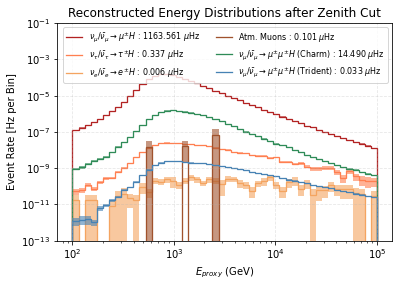

In [22]:
nbins = 50
#ebins = np.logspace(np.log10(1.1e3),np.log10(5e4),nbins+1)
ebins = np.logspace(2,5,nbins+1)

bincen = 0.5*(ebins[1:]+ebins[:-1])

plot_config = {'lw':1.3, 'ls':'-'}

plt.figure()

plot_config['color'] = colors[0]
plot_config['label'] = labels[0]
get_hist(bkg_holder[0], 'etrack', ebins, plot=True, **plot_config)


plot_config['color'] = colors[1]
plot_config['label'] = labels[1]
get_hist(bkg_holder[1], 'etrack', ebins, plot=True, **plot_config)

plot_config['color'] = colors[2]
plot_config['label'] = labels[2]
get_hist(bkg_holder[2], 'etrack', ebins, plot=True, **plot_config)


plot_config['color'] = colors[6]
plot_config['label'] = labels[6]
get_hist(bkg_holder[3], 'etrack', ebins, plot=True, **plot_config)

'''c='sienna'
ncor, _ = np.histogram(enarr, bins=ebins, weights=wtarr)
ncerr = np.sqrt(np.histogram(enarr, bins=ebins, weights=wtarr**2)[0])
plt.stairs(ncor, ebins, color=c, lw=1.3,
           label='Atm. Muons : '+'{:2.2f}'.format(np.sum(ncor)*1e6)+r' $\mu$Hz')
plt.stairs(ncor+ncerr, ebins, baseline=ncor-ncerr, fill=True, alpha=0.6,
          color=c)
'''
plot_config['color'] = colors[3]
plot_config['label'] = labels[3]
get_hist(sig_holder[0], 'etrack', ebins, plot=True, **plot_config)

plot_config['color'] = colors[4]
plot_config['label'] = labels[4]
get_hist(sig_holder[1], 'etrack', ebins, plot=True, **plot_config)

#plot_config['color'] = colors[5]
#plot_config['label'] = labels[5]
#get_hist(sig_holder[2], 'etrack', ebins, plot=True, **plot_config)

#plt.vlines(1.1e3, 1e-17,1e-3, linestyles='--', colors='k')
#plt.vlines(5e4, 1e-17,1e-3, linestyles='--', colors='k')

plt.grid(which='major', alpha=0.3, ls='--')
plt.legend(ncol=2, loc='upper right', fontsize=8)
plt.yscale('log')
plt.xscale('log')
#plt.ylim([1e-17,1e0])
plt.ylim([1e-13,1e-1])
plt.ylabel('Event Rate [Hz per Bin]')
plt.xlabel(r'$E_{proxy}$ (GeV)')
plt.title('Reconstructed Energy Distributions after Zenith Cut')
plt.show()

# Total MC nominal + unc. distributions

In [23]:
def get_totunc_charm(ebins, zbins, abins, bbins):
    avarlist = []
    bvarlist = []
    evarlist = []
    zvarlist = []
    
    #sbins = np.linspace(0,1,31)
    #ebins = np.logspace(np.log10(1.1e3),np.log10(5e4),nbins+1)
    #zbins = np.linspace(-1,0,nbins+1)

    anom,_ = np.histogram(nom_charm.event_arr[nom_charm.event_idx]['apred'], bins=abins,
                   weights=nom_charm.event_arr[nom_charm.event_idx]['weight'])
    bnom,_ = np.histogram(nom_charm.event_arr[nom_charm.event_idx]['bpred'], bins=bbins,
                   weights=nom_charm.event_arr[nom_charm.event_idx]['weight'])
    enom,_ = np.histogram(nom_charm.event_arr[nom_charm.event_idx]['etrack'], bins=ebins,
                   weights=nom_charm.event_arr[nom_charm.event_idx]['weight'])
    znom,_ = np.histogram(nom_charm.event_arr[nom_charm.event_idx]['cosz'], bins=zbins,
                   weights=nom_charm.event_arr[nom_charm.event_idx]['weight'])

    for process in sigsys_holder:
        anum,_ = np.histogram(process.event_arr[process.event_idx]['apred'], bins=abins,
                       weights=process.event_arr[process.event_idx]['weight'])
        bnum,_ = np.histogram(process.event_arr[process.event_idx]['bpred'], bins=bbins,
                       weights=process.event_arr[process.event_idx]['weight'])
        enum,_ = np.histogram(process.event_arr[process.event_idx]['etrack'], bins=ebins,
                       weights=process.event_arr[process.event_idx]['weight'])
        znum,_ = np.histogram(process.event_arr[process.event_idx]['cosz'], bins=zbins,
                       weights=process.event_arr[process.event_idx]['weight'])
        avar = (anum/anom-1)
        bvar = (bnum/bnom-1)
        evar = (enum/enom - 1)
        zvar = (znum/znom-1)
    
        avarlist.append(avar)
        bvarlist.append(bvar)
        evarlist.append(evar)
        zvarlist.append(zvar)

    syslist = ['XS','ConvNorm','ConvGamma', 'AstroNorm', 'AstroGamma']

    for sys in syslist:
        a1num, _ = np.histogram(nom_charm.event_arr[nom_charm.event_idx]['apred'], bins=abins,
                           weights=nom_charm.event_arr[nom_charm.event_idx][sys+'UP'])
        a2num, _ = np.histogram(nom_charm.event_arr[nom_charm.event_idx]['apred'], bins=abins,
                           weights=nom_charm.event_arr[nom_charm.event_idx][sys+'DN'])
        a1var = (a1num/anom - 1)
        a2var = (a2num/anom - 1)
    
        avarlist.append(a1var)
        avarlist.append(a2var)
    
        b1num, _ = np.histogram(nom_charm.event_arr[nom_charm.event_idx]['bpred'], bins=bbins,
                           weights=nom_charm.event_arr[nom_charm.event_idx][sys+'UP'])
        b2num, _ = np.histogram(nom_charm.event_arr[nom_charm.event_idx]['bpred'], bins=bbins,
                           weights=nom_charm.event_arr[nom_charm.event_idx][sys+'DN'])
        b1var = (b1num/bnom - 1)
        b2var = (b2num/bnom - 1)
    
        bvarlist.append(b1var)
        bvarlist.append(b2var)
        
        #----------------------------
        a1num, _ = np.histogram(nom_charm.event_arr[nom_charm.event_idx]['etrack'], bins=ebins,
                           weights=nom_charm.event_arr[nom_charm.event_idx][sys+'UP'])
        a2num, _ = np.histogram(nom_charm.event_arr[nom_charm.event_idx]['etrack'], bins=ebins,
                           weights=nom_charm.event_arr[nom_charm.event_idx][sys+'DN'])
        a1var = (a1num/enom - 1)
        a2var = (a2num/enom - 1)
    
        evarlist.append(a1var)
        evarlist.append(a2var)
    
        b1num, _ = np.histogram(nom_charm.event_arr[nom_charm.event_idx]['cosz'], bins=zbins,
                           weights=nom_charm.event_arr[nom_charm.event_idx][sys+'UP'])
        b2num, _ = np.histogram(nom_charm.event_arr[nom_charm.event_idx]['cosz'], bins=zbins,
                           weights=nom_charm.event_arr[nom_charm.event_idx][sys+'DN'])
        b1var = (b1num/znom - 1)
        b2var = (b2num/znom - 1)
    
        zvarlist.append(b1var)
        zvarlist.append(b2var)

    return evarlist, zvarlist, avarlist, bvarlist

In [24]:
def get_totunc_ccdis(ebins, zbins, abins, bbins):
    avarlist = []
    bvarlist = []
    evarlist = []
    zvarlist = []
    
    #sbins = np.linspace(0,1,31)
    #ebins = np.logspace(np.log10(1.1e3),np.log10(5e4),nbins+1)
    #zbins = np.linspace(-1,0,nbins+1)

    anom,_ = np.histogram(nom_ccdis.event_arr[nom_ccdis.event_idx]['apred'], bins=abins,
                   weights=nom_ccdis.event_arr[nom_ccdis.event_idx]['weight'])
    bnom,_ = np.histogram(nom_ccdis.event_arr[nom_ccdis.event_idx]['bpred'], bins=bbins,
                   weights=nom_ccdis.event_arr[nom_ccdis.event_idx]['weight'])
    enom,_ = np.histogram(nom_ccdis.event_arr[nom_ccdis.event_idx]['etrack'], bins=ebins,
                   weights=nom_ccdis.event_arr[nom_ccdis.event_idx]['weight'])
    znom,_ = np.histogram(nom_ccdis.event_arr[nom_ccdis.event_idx]['cosz'], bins=zbins,
                   weights=nom_ccdis.event_arr[nom_ccdis.event_idx]['weight'])

    for process in ccdis_holder[1:]:
        anum,_ = np.histogram(process.event_arr[process.event_idx]['apred'], bins=abins,
                       weights=process.event_arr[process.event_idx]['weight'])
        bnum,_ = np.histogram(process.event_arr[process.event_idx]['bpred'], bins=bbins,
                       weights=process.event_arr[process.event_idx]['weight'])
        enum,_ = np.histogram(process.event_arr[process.event_idx]['etrack'], bins=ebins,
                       weights=process.event_arr[process.event_idx]['weight'])
        znum,_ = np.histogram(process.event_arr[process.event_idx]['cosz'], bins=zbins,
                       weights=process.event_arr[process.event_idx]['weight'])

        avar = (anum/anom-1)
        bvar = (bnum/bnom-1)
        evar = (enum/enom-1)
        zvar = (znum/znom-1)
    
        avarlist.append(avar)
        bvarlist.append(bvar)
        evarlist.append(evar)
        zvarlist.append(zvar)

    syslist = ['XS','ConvNorm','ConvGamma', 'AstroNorm', 'AstroGamma']

    for sys in syslist:
        a1num, _ = np.histogram(nom_ccdis.event_arr[nom_ccdis.event_idx]['apred'], bins=abins,
                           weights=nom_ccdis.event_arr[nom_ccdis.event_idx][sys+'UP'])
        a2num, _ = np.histogram(nom_ccdis.event_arr[nom_ccdis.event_idx]['apred'], bins=abins,
                           weights=nom_ccdis.event_arr[nom_ccdis.event_idx][sys+'DN'])
        a1var = (a1num/anom - 1)
        a2var = (a2num/anom - 1)
    
        avarlist.append(a1var)
        avarlist.append(a2var)
    
        b1num, _ = np.histogram(nom_ccdis.event_arr[nom_ccdis.event_idx]['bpred'], bins=bbins,
                           weights=nom_ccdis.event_arr[nom_ccdis.event_idx][sys+'UP'])
        b2num, _ = np.histogram(nom_ccdis.event_arr[nom_ccdis.event_idx]['bpred'], bins=bbins,
                           weights=nom_ccdis.event_arr[nom_ccdis.event_idx][sys+'DN'])
        b1var = (b1num/bnom - 1)
        b2var = (b2num/bnom - 1)
    
        bvarlist.append(b1var)
        bvarlist.append(b2var)
        
        #----------------------------
        a1num, _ = np.histogram(nom_ccdis.event_arr[nom_ccdis.event_idx]['etrack'], bins=ebins,
                           weights=nom_ccdis.event_arr[nom_ccdis.event_idx][sys+'UP'])
        a2num, _ = np.histogram(nom_ccdis.event_arr[nom_ccdis.event_idx]['etrack'], bins=ebins,
                           weights=nom_ccdis.event_arr[nom_ccdis.event_idx][sys+'DN'])
        a1var = (a1num/enom - 1)
        a2var = (a2num/enom - 1)
    
        evarlist.append(a1var)
        evarlist.append(a2var)
    
        b1num, _ = np.histogram(nom_ccdis.event_arr[nom_ccdis.event_idx]['cosz'], bins=zbins,
                           weights=nom_ccdis.event_arr[nom_ccdis.event_idx][sys+'UP'])
        b2num, _ = np.histogram(nom_ccdis.event_arr[nom_ccdis.event_idx]['cosz'], bins=zbins,
                           weights=nom_ccdis.event_arr[nom_ccdis.event_idx][sys+'DN'])
        b1var = (b1num/znom - 1)
        b2var = (b2num/znom - 1)
    
        zvarlist.append(b1var)
        zvarlist.append(b2var)

    return evarlist, zvarlist, avarlist, bvarlist

In [25]:
def get_tot(avarlist):
    #calculate total systematics variation
    sdom = np.maximum(avarlist[0], avarlist[1])
    shole = np.maximum(avarlist[2], avarlist[3])

    sbulk1 = np.maximum(avarlist[4], avarlist[5])
    sbulk2 = np.maximum(avarlist[6], avarlist[7])
    sbulk = np.maximum(sbulk1, sbulk2)

    sxs = np.maximum(avarlist[8],avarlist[9])
    scnorm = np.maximum(avarlist[10],avarlist[11])
    scgamma = np.maximum(avarlist[12],avarlist[13])
    sanorm = np.maximum(avarlist[14],avarlist[15])
    sagamma = np.maximum(avarlist[16],avarlist[17])

    stot = np.sqrt(sdom**2+shole**2+sbulk**2+sxs**2+scnorm**2+scgamma**2+sanorm**2+sagamma**2)
    return stot

def get_tot1(ccbvarlist):
    bdom = np.maximum(ccbvarlist[0], ccbvarlist[1])
    bhole = np.maximum(ccbvarlist[2], ccbvarlist[3])

    bbulk = ccbvarlist[4]

    bxs = np.maximum(ccbvarlist[5],ccbvarlist[6])
    bcnorm = np.maximum(ccbvarlist[7],ccbvarlist[8])
    bcgamma = np.maximum(ccbvarlist[9],ccbvarlist[10])
    banorm = np.maximum(ccbvarlist[11],ccbvarlist[12])
    bagamma = np.maximum(ccbvarlist[13],ccbvarlist[14])

    btot = np.sqrt(bdom**2+bhole**2+bbulk**2+bxs**2+bcnorm**2+bcgamma**2+banorm**2+bagamma**2)

    return btot


In [46]:
time = config['Livetimes']['fullsample']
print (time)

336452722.546


In [27]:
# define the holder lists
charm_holder = [nom_charm]+sigsys_holder
ccdis_holder = [nom_ccdis]+bkgsys_holder

# Define Cut Regions

In [207]:
#Full
#reg = config['CutRegions']['TOT']

#CR
#reg = config['CutRegions']['CR']

#ROI
reg = config['CutRegions']['ROI']

#B cut [0.4 -- 1.0]
#reg = ["boxcut", [0.0, 0.4, 1.0, 1.0]]

#A cut [0.8 -- 1.0]
#reg = ["boxcut", [0.8, 0.0, 1.0, 1.0]]

nbins = 20
amin = 0.8
amax = 1.
bmin = 0.4
bmax = 1.

ebins = np.logspace(np.log10(1.1e3),np.log10(5e4),nbins+1)
zbins = np.linspace(-1,0,nbins+1)

#abins = np.linspace(0,1,nbins+1)
#bbins = np.linspace(0,1,nbins+1)

abins = np.linspace(amin,amax,nbins+1)
bbins = np.linspace(bmin,bmax,nbins+1)

In [208]:
for process in sig_holder:
    process.reset_cut()
    process.apply_energyCut()
    process.apply_zenithCut()
    process.apply_boxCut(reg[1][0], reg[1][1],
                       amax=reg[1][2], bmax=reg[1][3])

for process in bkg_holder:
    process.reset_cut()
    process.apply_energyCut()
    process.apply_zenithCut()
    process.apply_boxCut(reg[1][0], reg[1][1],
                       amax=reg[1][2], bmax=reg[1][3])

for process in sigsys_holder:
    process.reset_cut()
    process.apply_energyCut()
    process.apply_zenithCut()
    process.apply_boxCut(reg[1][0], reg[1][1],
                       amax=reg[1][2], bmax=reg[1][3])

for process in bkgsys_holder:
    process.reset_cut()
    process.apply_energyCut()
    process.apply_zenithCut()
    process.apply_boxCut(reg[1][0], reg[1][1],
                       amax=reg[1][2], bmax=reg[1][3])


data.reset_cut()
data.apply_energyCut()
data.apply_zenithCut()
data.apply_boxCut(reg[1][0], reg[1][1],
                       amax=reg[1][2], bmax=reg[1][3])

In [209]:
sigerr = get_totunc_charm(ebins, zbins, abins, bbins)

In [210]:
bkgerr = get_totunc_ccdis(ebins, zbins, abins, bbins)

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.1/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.1/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in true_divide
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.1/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in true_divide


In [211]:
senerr = get_tot(sigerr[0])
sznerr = get_tot(sigerr[1])
saperr = get_tot(sigerr[2])
sbperr = get_tot(sigerr[3])

In [212]:
benerr = get_tot1(bkgerr[0])
bznerr = get_tot1(bkgerr[1])
baperr = get_tot1(bkgerr[2])
bbperr = get_tot1(bkgerr[3])

In [213]:
def get_hist(p, prop, bins):
    #time = 0.76*365*24*60*60
    s,_ = np.histogram(p.event_arr[p.event_idx][prop], bins=bins,
                   weights=p.event_arr[p.event_idx]['weight']*time)

    return s

In [214]:
time

336452722.546

In [215]:
bincen = 0.5*(ebins[1:]+ebins[:-1])

bindiff = np.diff(ebins)/2.

b1 = get_hist(bkg_holder[0], 'etrack', ebins)
b2 = get_hist(bkg_holder[1], 'etrack', ebins)
b3 = get_hist(bkg_holder[2], 'etrack', ebins)
b4 = get_hist(bkg_holder[3], 'etrack', ebins)

s1 = get_hist(sig_holder[0], 'etrack', ebins)
s2 = get_hist(sig_holder[1], 'etrack', ebins)

tot = b1+b2+b3+b4+s1+s2

tot_bkg = b1+b2+b3+b4
tot_sig = s1+s2

totup = tot+b1*benerr+s1*senerr
totdn = tot-b1*benerr-s1*senerr

ndata,_ = np.histogram(data.event_arr[data.event_idx]['etrack'], bins=ebins)
nerr = np.sqrt(ndata)


# Total MC + Grey Unc. Band

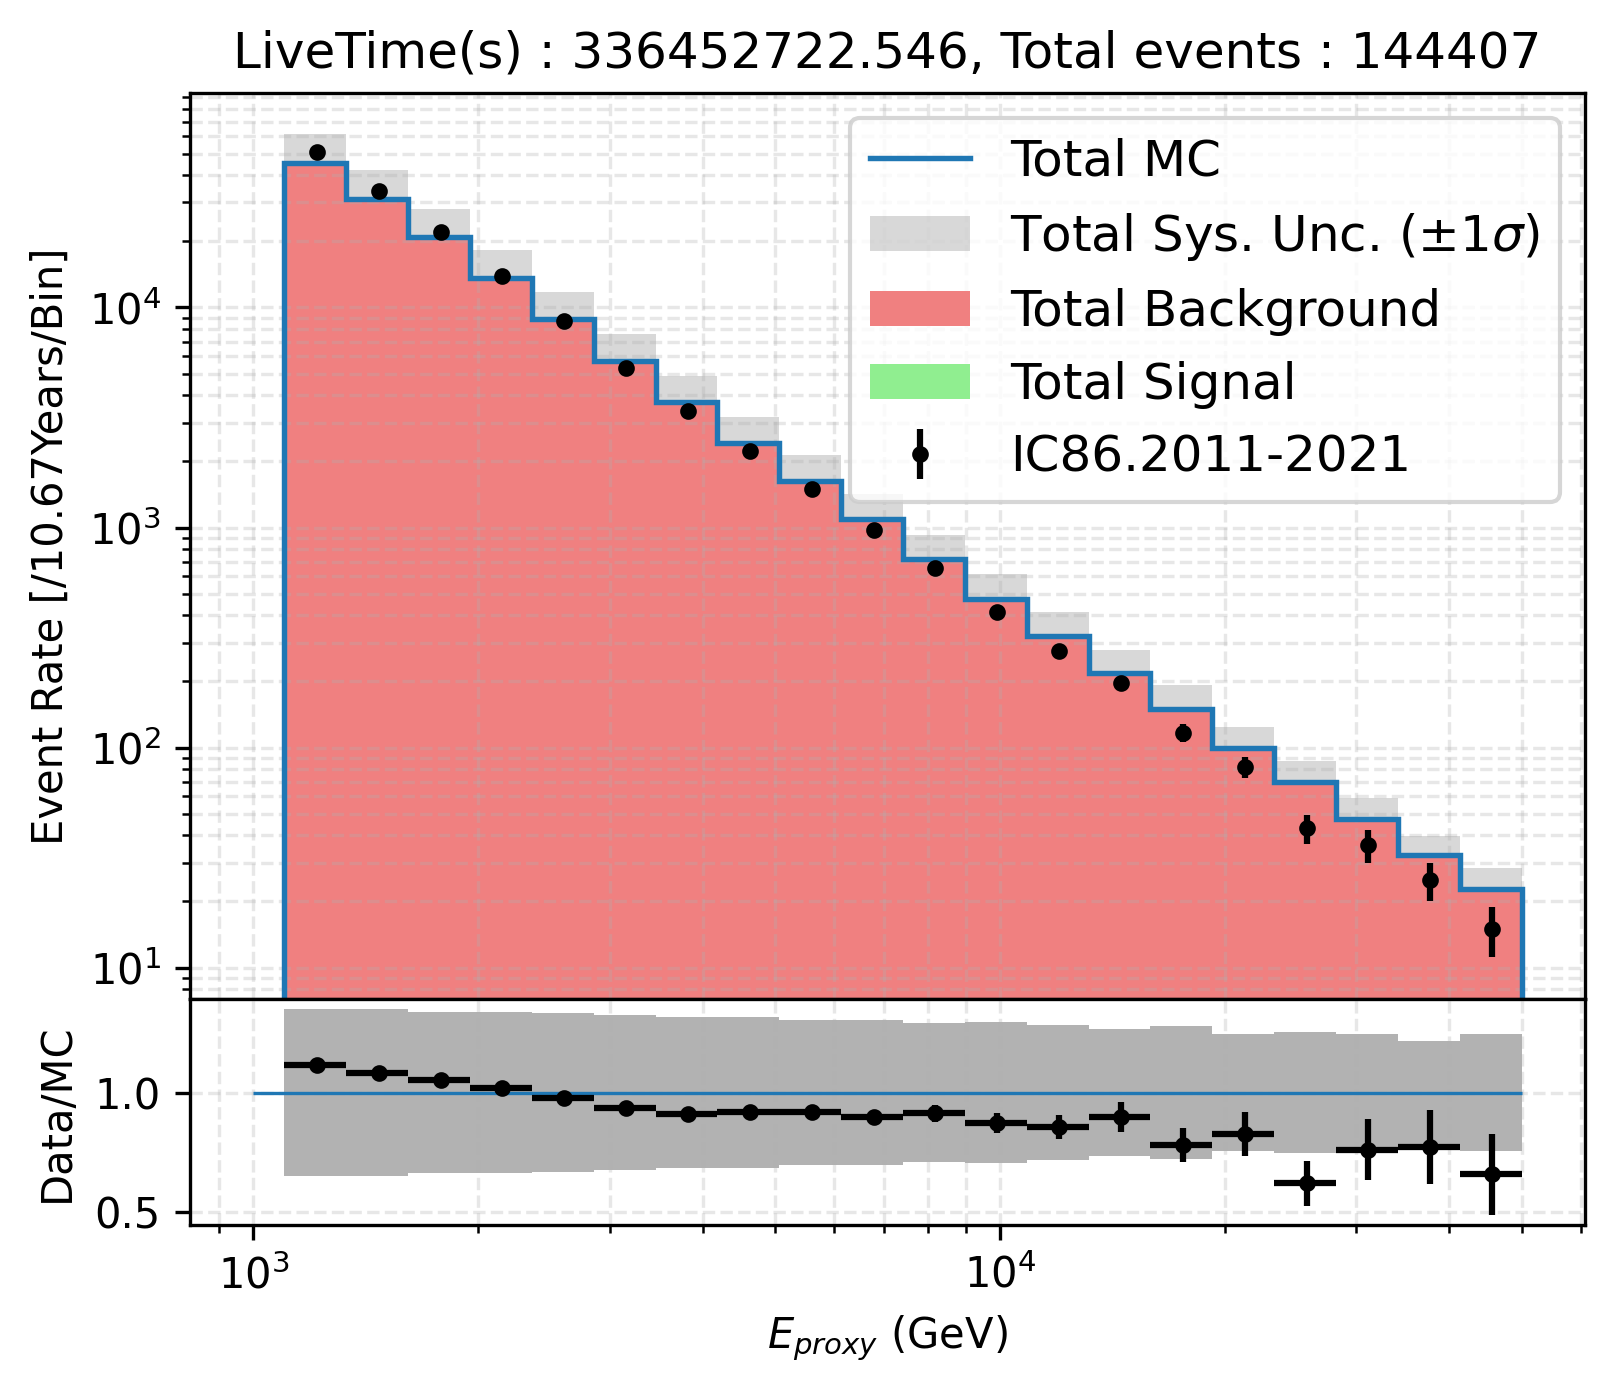

In [126]:
fig = plt.figure(figsize=(6,5))
gs = fig.add_gridspec(2, hspace=0, height_ratios=[4,1])
axs = gs.subplots(sharex=True)

axs[0].stairs(tot, ebins, label='Total MC',
          color='tab:blue', lw=1.3, zorder=2)
axs[0].stairs(totup, ebins, baseline=totdn, fill=True, alpha=0.3, color='grey',
                label=r'Total Sys. Unc. ($\pm 1\sigma$)')

axs[0].stairs(tot_bkg, ebins, baseline = np.zeros(len(tot_bkg)), fill=True, 
             label='Total Background', color='lightcoral' )

axs[0].stairs(tot_sig+tot_bkg, ebins, baseline = tot_bkg, fill=True, 
             label='Total Signal', color='lightgreen' )

#burn sample
#axs[0].errorbar(bincen, nburn, yerr=nerr, fmt='k.', label='IC86.2011-2018 (10%)', zorder=40)

#full sample
axs[0].errorbar(bincen, ndata, yerr=nerr, fmt='k.', label='IC86.2011-2021', zorder=40)
#plot_hist(sig_holder[1], 'etrack', ebins, bincen, labels[5])

axs[0].grid(which='both', alpha=0.3, ls='--')
axs[0].legend(loc='upper right', fontsize=12)
axs[0].set_yscale('log')
axs[0].set_xscale('log')

axs[0].set_ylabel('Event Rate [/10.67Years/Bin]')


#axs[0].set_ylim([0.5,4e3])
axs[1].stairs(totup/tot, ebins, baseline=totdn/tot, fill=True, alpha=0.6, color='grey')
axs[1].hlines(1, 1e3, 5e4, colors='tab:blue', linewidth=0.8)
axs[1].errorbar(bincen, ndata/tot, yerr=nerr/tot, xerr=bindiff,
                fmt='k.', zorder=40)

#axs[1].set_ylim([0,4])
axs[1].grid(which='both', alpha=0.3, ls='--')
axs[1].set_ylabel("Data/MC")
axs[1].set_xlabel(r'$E_{proxy}$ (GeV)')
axs[0].set_title(f"LiveTime(s) : {time}, Total events : {np.sum(ndata)}")
#plt.ylabel('Event Rate [per 0.76 Years per Bin]')
#plt.xlabel(r'$E_{proxy}$ (GeV)')
#plt.title("Burn Sample Comparison")
plt.show()

# Signal + Background MC + dark unc bound lines

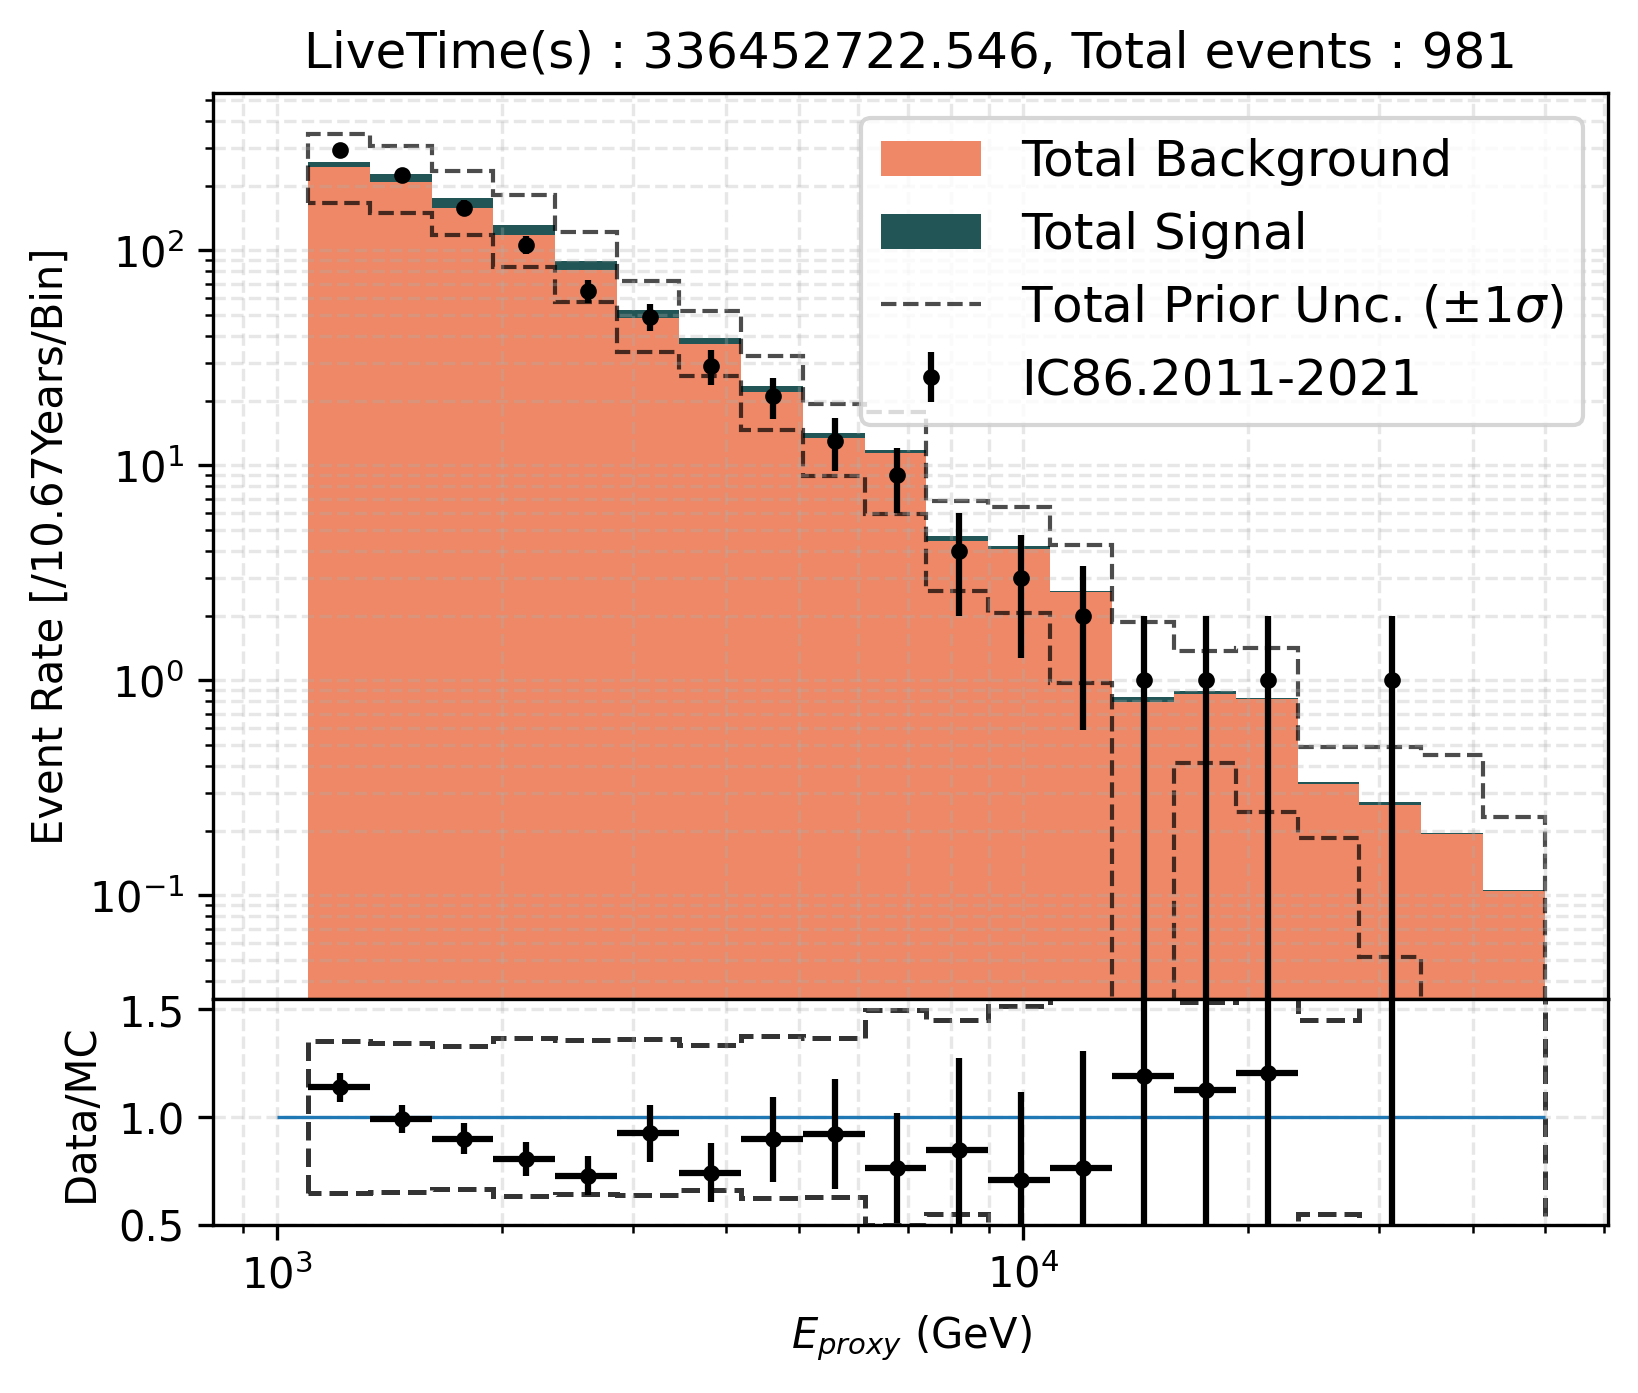

In [219]:
fig = plt.figure(figsize=(6,5))
gs = fig.add_gridspec(2, hspace=0, height_ratios=[4,1])
axs = gs.subplots(sharex=True)

bcolor = '#EE8866'
scolor = '#225555'
#axs[0].stairs(tot, ebins, label='Total MC',
#          color='tab:blue', lw=1.3, zorder=2)
axs[0].stairs(tot_bkg, ebins, baseline = np.zeros(len(tot_bkg)), fill=True, 
             label='Total Background', color=bcolor )

axs[0].stairs(tot_sig+tot_bkg, ebins, baseline = tot_bkg, fill=True, 
             label='Total Signal', color=scolor )

axs[0].stairs(totup, ebins, baseline=totdn, fill=False,
              ls = "--", alpha=0.7, color='k',
                label=r'Total Prior Unc. ($\pm 1\sigma$)')


#burn sample
#axs[0].errorbar(bincen, nburn, yerr=nerr, fmt='k.', label='IC86.2011-2018 (10%)', zorder=40)

#full sample
axs[0].errorbar(bincen, ndata, yerr=nerr, fmt='k.', label='IC86.2011-2021', zorder=40)
#plot_hist(sig_holder[1], 'etrack', ebins, bincen, labels[5])

axs[0].grid(which='both', alpha=0.3, ls='--')
axs[0].legend(loc='upper right', fontsize=12)
axs[0].set_yscale('log')
axs[0].set_xscale('log')

axs[0].set_ylabel('Event Rate [/10.67Years/Bin]')

# CR range scale
#axs[0].set_ylim([0.1,2e4])

axs[1].hlines(1, 1e3, 5e4, colors='tab:blue', linewidth=0.8)
axs[1].errorbar(bincen, ndata/tot, yerr=nerr/tot, xerr=bindiff,
                fmt='k.', zorder=40)
axs[1].stairs(totup/tot, ebins, baseline=totdn/tot, fill=False,
              ls = '--', lw=1.2, alpha=0.8, color='k')


# CR Range scale
#axs[1].set_ylim([0.,2.2])

#ROI Range scale
axs[1].set_ylim([0.5,1.55])
axs[1].grid(which='both', alpha=0.3, ls='--')
axs[1].set_ylabel("Data/MC")
axs[1].set_xlabel(r'$E_{proxy}$ (GeV)')
axs[0].set_title(f"LiveTime(s) : {time}, Total events : {np.sum(ndata)}")
#plt.ylabel('Event Rate [per 0.76 Years per Bin]')
#plt.xlabel(r'$E_{proxy}$ (GeV)')
#plt.title("Burn Sample Comparison")
plt.show()

In [117]:
np.sum(ndata)

144407

In [220]:
bincen = 0.5*(zbins[1:]+zbins[:-1])

prop = 'cosz'

bindiff = np.diff(zbins)/2.

b1 = get_hist(bkg_holder[0], prop, zbins)
b2 = get_hist(bkg_holder[1], prop, zbins)
b3 = get_hist(bkg_holder[2], prop, zbins)
b4 = get_hist(bkg_holder[3], prop, zbins)

s1 = get_hist(sig_holder[0], prop, zbins)
s2 = get_hist(sig_holder[1], prop, zbins)

tot = b1+b2+b3+b4+s1+s2
tot_bkg = b1+b2+b3+b4
tot_sig = s1+s2
totup = tot+b1*bznerr+s1*sznerr
totdn = tot-b1*bznerr-s1*sznerr

ndata,_ = np.histogram(data.event_arr[data.event_idx][prop], bins=zbins)
nerr = np.sqrt(ndata)


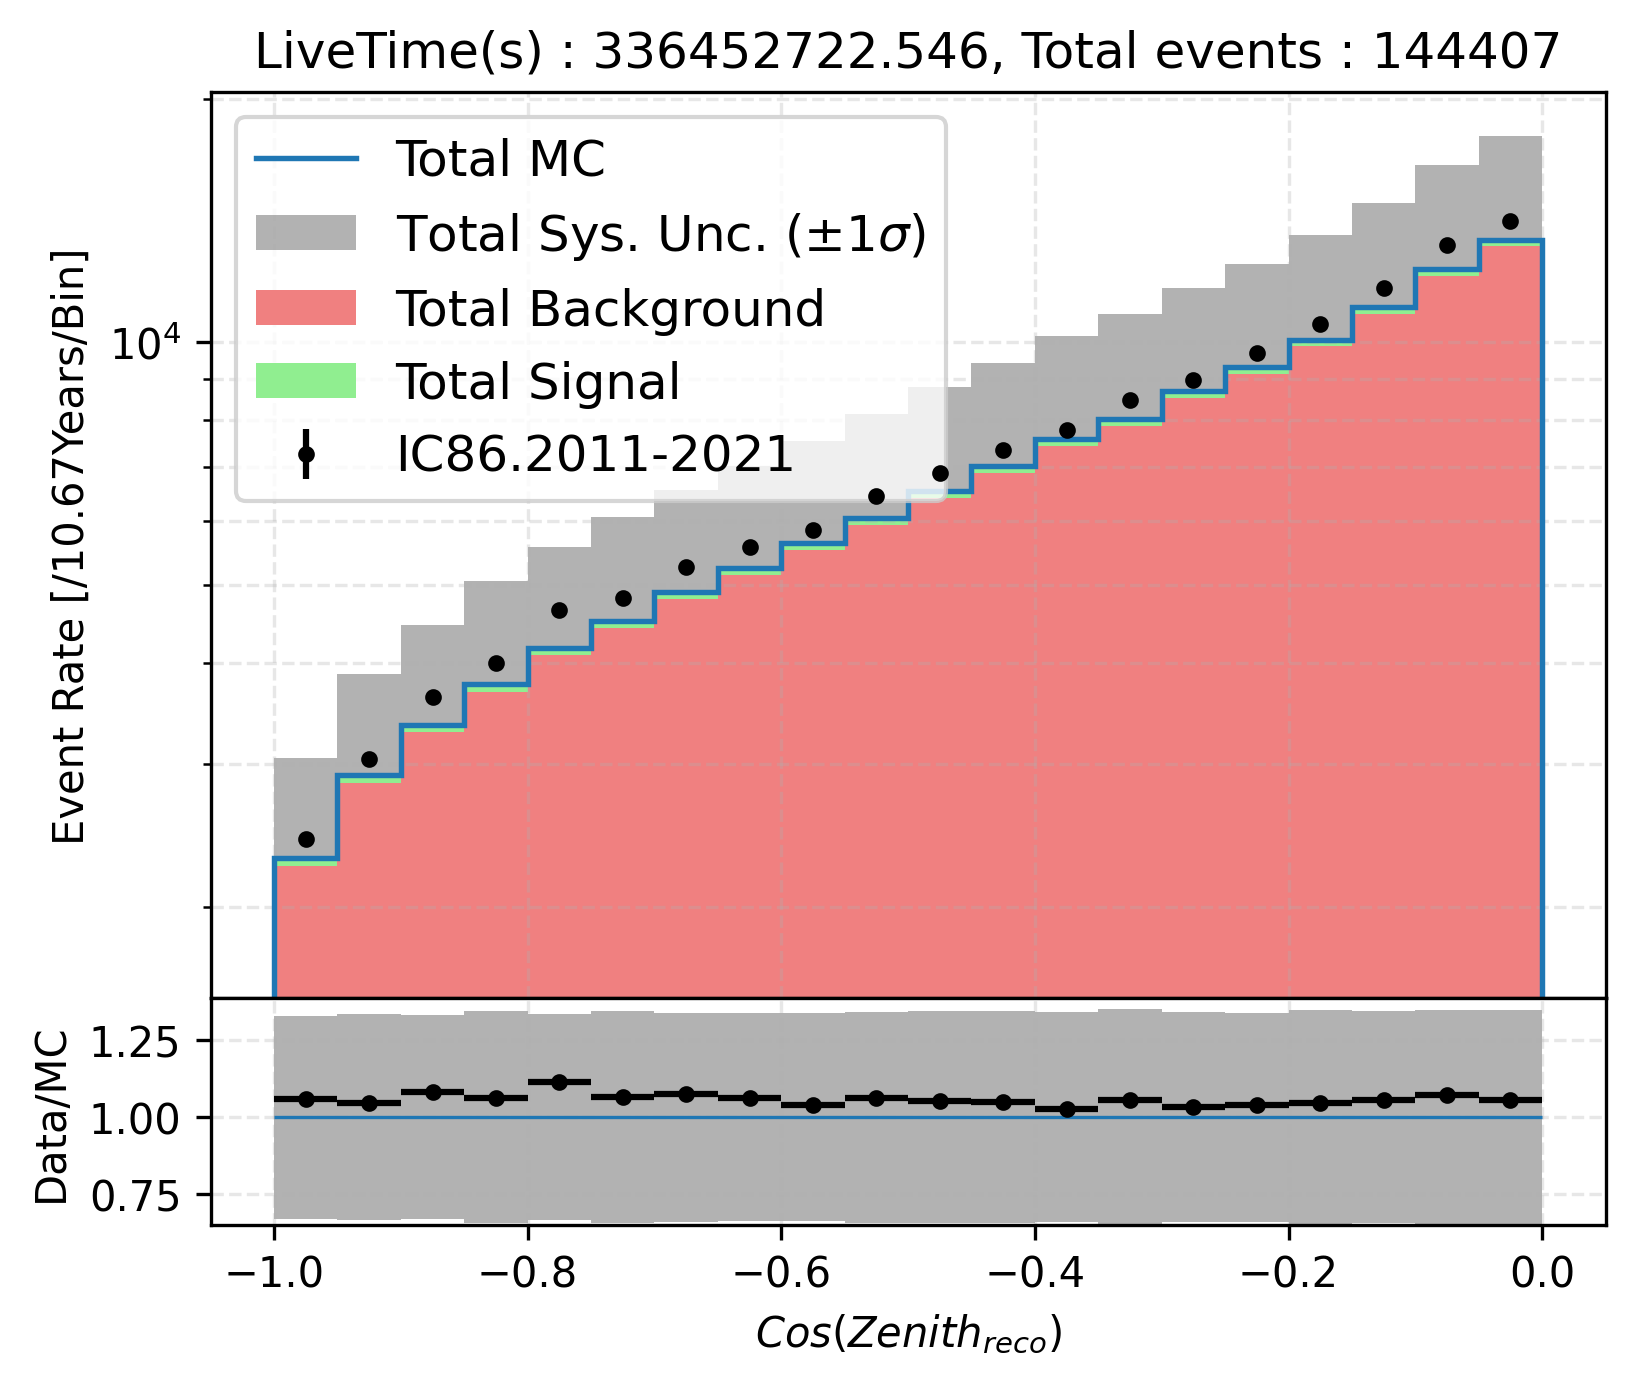

In [119]:
fig = plt.figure(figsize=(6,5))
gs = fig.add_gridspec(2, hspace=0, height_ratios=[4,1])
axs = gs.subplots(sharex=True)

axs[0].stairs(tot, zbins, label='Total MC',
          color='tab:blue', lw=1.3, zorder=2)
axs[0].stairs(totup, zbins, baseline=totdn, fill=True, alpha=0.6, color='grey',
                label=r'Total Sys. Unc. ($\pm 1\sigma$)')

axs[0].stairs(tot_bkg, zbins, baseline = np.zeros(len(tot_bkg)), fill=True, 
             label='Total Background', color='lightcoral' )

axs[0].stairs(tot_sig+tot_bkg, zbins, baseline = tot_bkg, fill=True, 
             label='Total Signal', color='lightgreen' )


axs[0].errorbar(bincen, ndata, yerr=nerr, fmt='k.', label='IC86.2011-2021', zorder=40)
#plot_hist(sig_holder[1], 'etrack', ebins, bincen, labels[5])

axs[0].grid(which='both', alpha=0.3, ls='--')
axs[0].legend(loc='upper left', fontsize=12)
axs[0].set_yscale('log')
axs[0].set_ylabel('Event Rate [/10.67Years/Bin]')

axs[1].stairs(totup/tot, zbins, baseline=totdn/tot, fill=True, alpha=0.6, color='grey')
axs[1].hlines(1, -1, 0, colors='tab:blue', linewidth=0.8)
axs[1].errorbar(bincen, ndata/tot, yerr=nerr/tot, xerr=bindiff,
                fmt='k.', zorder=40)

#axs[1].set_ylim([0.6,1.4])
axs[1].grid(which='both', alpha=0.3, ls='--')
axs[1].set_ylabel("Data/MC")
axs[1].set_xlabel(r'$Cos(Zenith_{reco})$')
axs[0].set_title(f"LiveTime(s) : {time}, Total events : {np.sum(ndata)}")


#plt.ylabel('Event Rate [per 0.76 Years per Bin]')
#plt.xlabel(r'$E_{proxy}$ (GeV)')
#plt.title("Burn Sample Comparison")
plt.show()

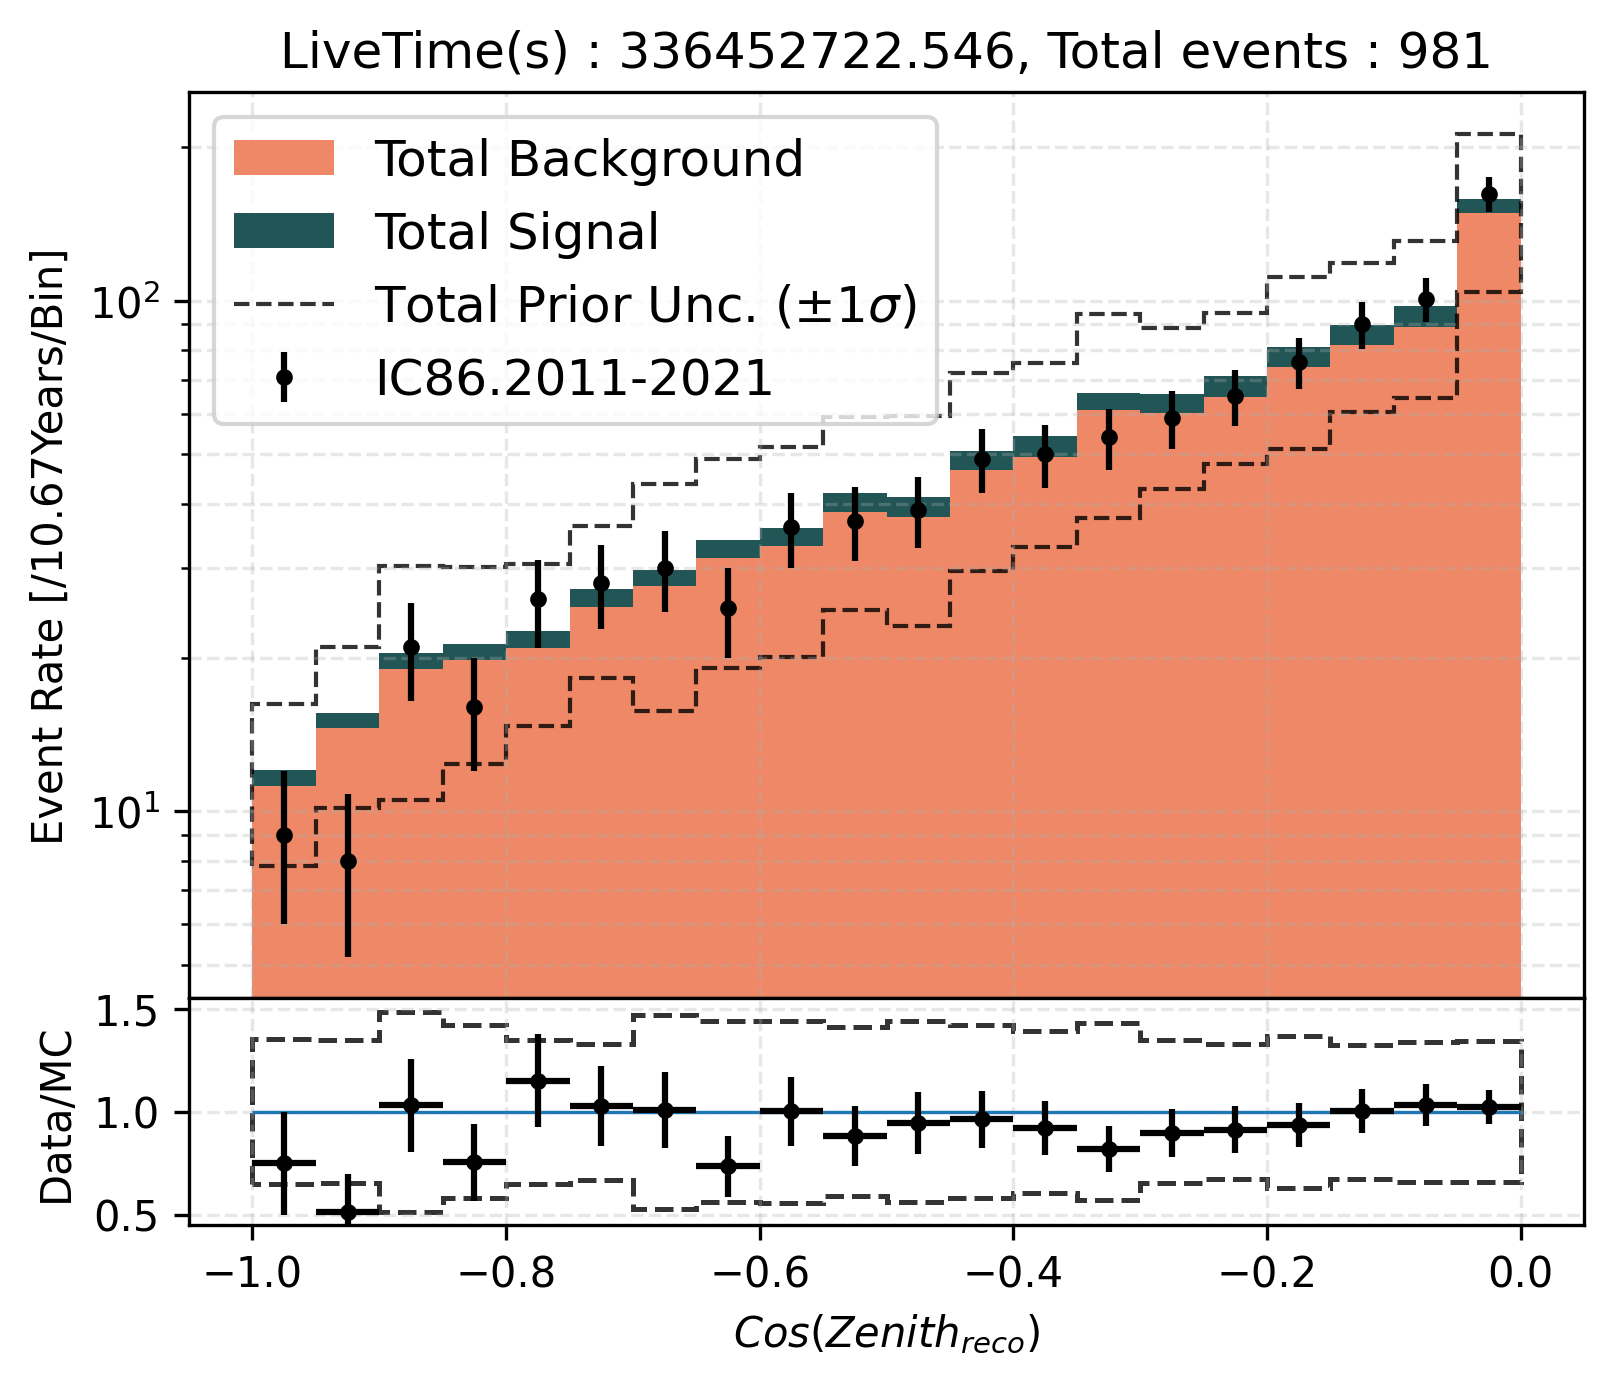

In [225]:
fig = plt.figure(figsize=(6,5))
gs = fig.add_gridspec(2, hspace=0, height_ratios=[4,1])
axs = gs.subplots(sharex=True)

axs[0].stairs(tot_bkg, zbins, baseline = np.zeros(len(tot_bkg)), fill=True, 
             label='Total Background', color=bcolor )

axs[0].stairs(tot_sig+tot_bkg, zbins, baseline = tot_bkg, fill=True, 
             label='Total Signal', color=scolor )

axs[0].stairs(totup, zbins, baseline=totdn, fill=False,
              ls = '--', alpha=0.8, color='k',
                label=r'Total Prior Unc. ($\pm 1\sigma$)')


axs[0].errorbar(bincen, ndata, yerr=nerr, fmt='k.', label='IC86.2011-2021', zorder=40)
#plot_hist(sig_holder[1], 'etrack', ebins, bincen, labels[5])

axs[0].grid(which='both', alpha=0.3, ls='--')
axs[0].legend(loc='upper left', fontsize=12)
axs[0].set_yscale('log')
axs[0].set_ylabel('Event Rate [/10.67Years/Bin]')

axs[1].stairs(totup/tot, zbins, baseline=totdn/tot, fill=False,
              ls = '--', lw=1.2, alpha=0.8, color='k')
axs[1].hlines(1, -1, 0, colors='tab:blue', linewidth=0.8)
axs[1].errorbar(bincen, ndata/tot, yerr=nerr/tot, xerr=bindiff,
                fmt='k.', zorder=40)

#CR range scale
#axs[1].set_ylim([0.6,1.4])

# ROI range scale
axs[1].set_ylim([.45,1.55])

axs[1].grid(which='both', alpha=0.3, ls='--')
axs[1].set_ylabel("Data/MC")
axs[1].set_xlabel(r'$Cos(Zenith_{reco})$')
axs[0].set_title(f"LiveTime(s) : {time}, Total events : {np.sum(ndata)}")


#plt.ylabel('Event Rate [per 0.76 Years per Bin]')
#plt.xlabel(r'$E_{proxy}$ (GeV)')
#plt.title("Burn Sample Comparison")
plt.show()

In [226]:
bincen = 0.5*(abins[1:]+abins[:-1])

prop = 'apred'

bindiff = np.diff(abins)/2.

b1 = get_hist(bkg_holder[0], prop, abins)
b2 = get_hist(bkg_holder[1], prop, abins)
b3 = get_hist(bkg_holder[2], prop, abins)
b4 = get_hist(bkg_holder[3], prop, abins)

s1 = get_hist(sig_holder[0], prop, abins)
s2 = get_hist(sig_holder[1], prop, abins)

tot = b1+b2+b3+b4+s1+s2
tot_bkg = b1+b2+b3+b4
tot_sig = s1+s2

totup = tot+b1*baperr+s1*saperr
totdn = tot-b1*baperr-s1*saperr

ndata,_ = np.histogram(data.event_arr[data.event_idx][prop], bins=abins)
nerr = np.sqrt(ndata)


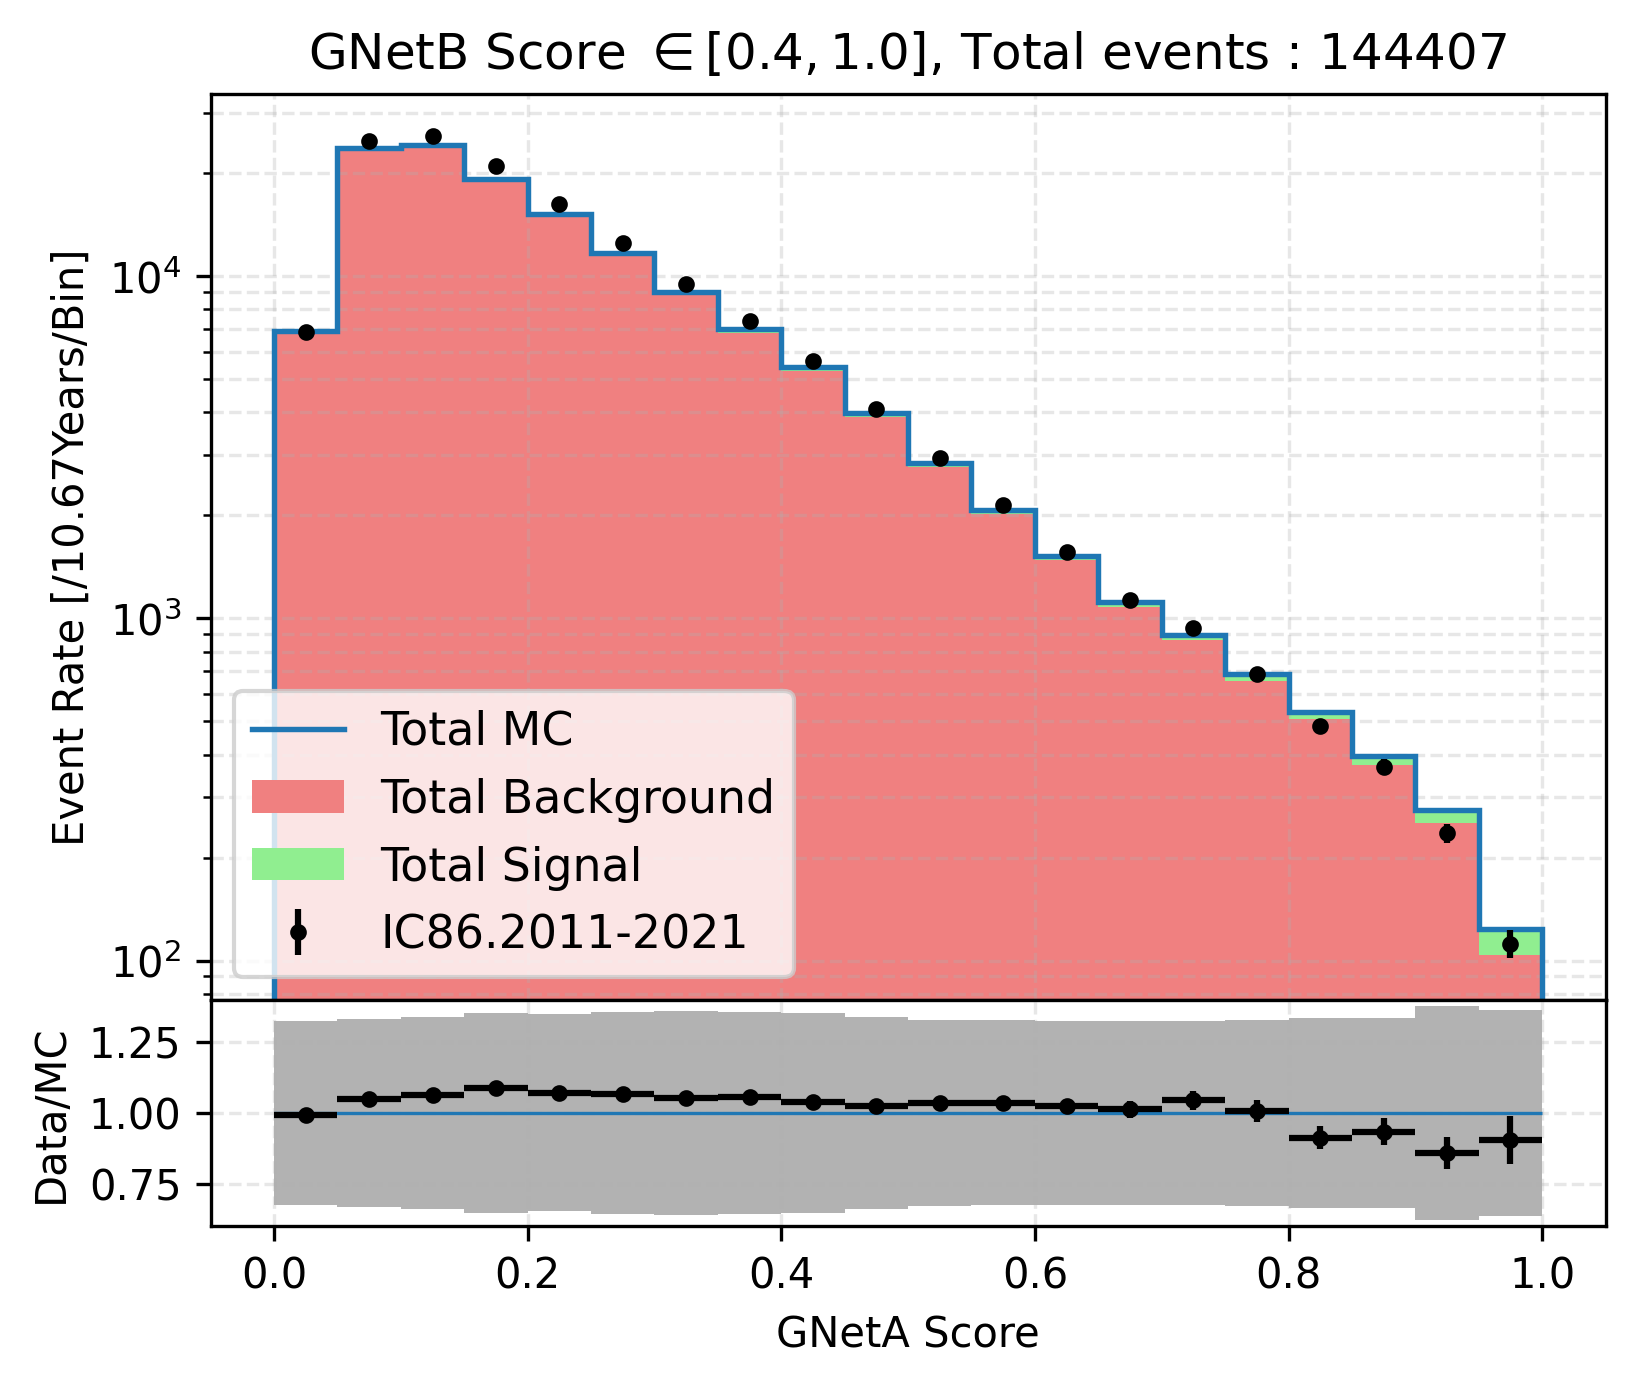

In [145]:
xmin = 0.
xmax = 1.

fig = plt.figure(figsize=(6,5))
gs = fig.add_gridspec(2, hspace=0, height_ratios=[4,1])
axs = gs.subplots(sharex=True)

#axs[0].fill_betweenx((7e1,2e4),0.8, 1.0, color='tab:green', alpha=0.2, label='ROI')
#axs[1].fill_betweenx((0.6,1.4),0.8, 1.0, color='tab:green', alpha=0.2)

axs[0].stairs(tot, abins, label='Total MC',
          color='tab:blue', lw=1.3, zorder=2)
#axs[0].stairs(totup, abins, baseline=totdn, fill=True, alpha=0.6, color='grey',
#                label=r'Total Sys. Unc. ($\pm 1\sigma$)', zorder=40)

axs[0].stairs(tot_bkg, abins, baseline = np.zeros(len(tot_bkg)), fill=True, 
             label='Total Background', color='lightcoral' )

axs[0].stairs(tot_sig+tot_bkg, abins, baseline = tot_bkg, fill=True, 
             label='Total Signal', color='lightgreen' )


axs[0].errorbar(bincen, ndata, yerr=nerr, fmt='k.', label='IC86.2011-2021', zorder=40)
#plot_hist(sig_holder[1], 'etrack', ebins, bincen, labels[5])

axs[0].grid(which='both', alpha=0.3, ls='--')
axs[0].legend(loc='lower left', fontsize=11)
axs[0].set_yscale('log')
axs[0].set_ylabel('Event Rate [/10.67Years/Bin]')
#axs[0].set_ylim([7e1,2e4])

axs[1].stairs(totup/tot, abins, baseline=totdn/tot, fill=True, alpha=0.6, color='grey')
axs[1].hlines(1, xmin,xmax, colors='tab:blue', linewidth=0.8)
axs[1].errorbar(bincen, ndata/tot, yerr=nerr/tot, xerr=bindiff,
                fmt='k.', zorder=40)

axs[1].set_ylim([0.6,1.4])
axs[1].grid(which='both', alpha=0.3, ls='--')
axs[1].set_ylabel("Data/MC")
axs[1].set_xlabel(r'GNetA Score')
#axs[0].set_title(f"LiveTime(s) : {time}, Total events : {np.sum(ndata)}")
axs[0].set_title(rf"GNetB Score $\in [0.4,1.0]$, Total events : {np.sum(ndata)}")

#plt.ylabel('Event Rate [per 0.76 Years per Bin]')
#plt.xlabel(r'$E_{proxy}$ (GeV)')
#plt.title("Burn Sample Comparison")
plt.show()

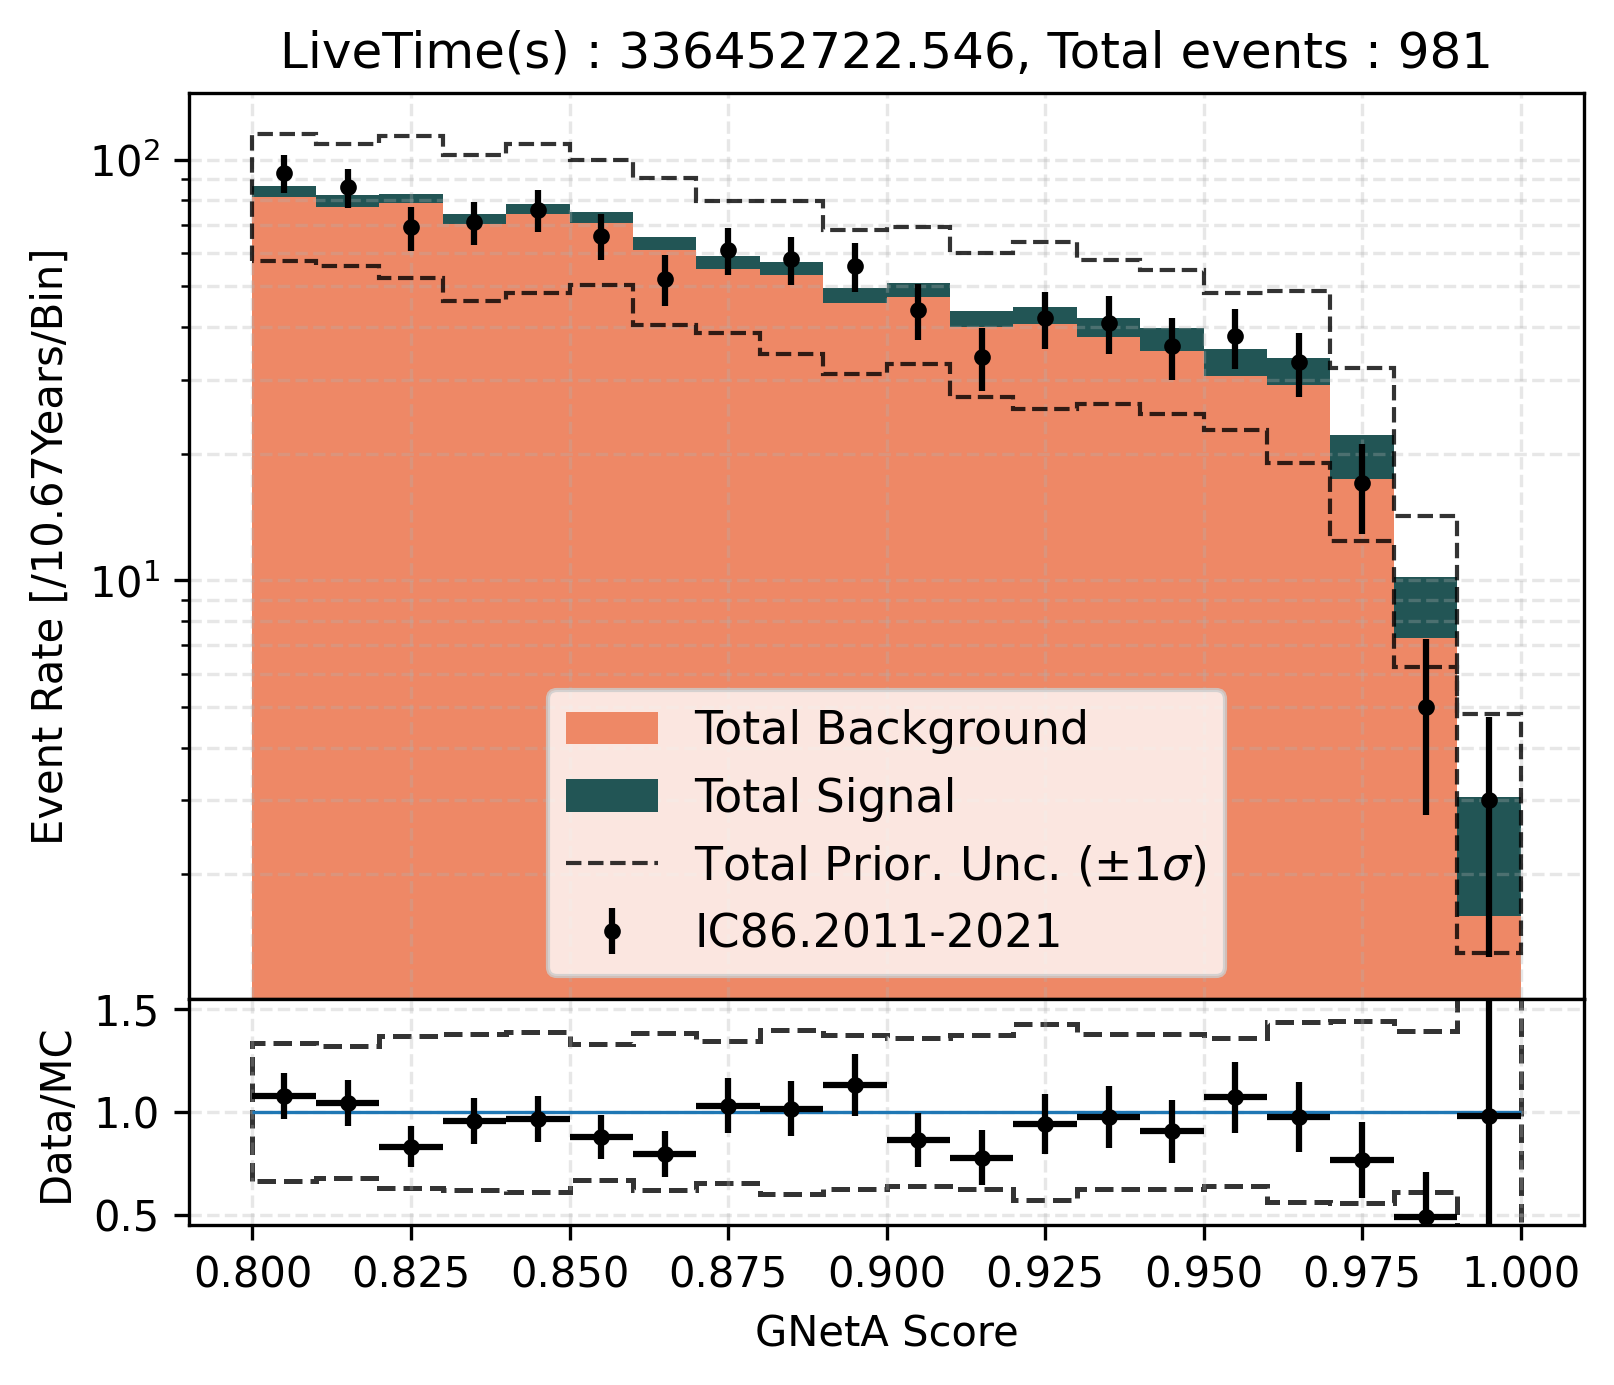

In [231]:
fig = plt.figure(figsize=(6,5))
gs = fig.add_gridspec(2, hspace=0, height_ratios=[4,1])
axs = gs.subplots(sharex=True)

#axs[0].fill_betweenx((7e1,2e4),0.8, 1.0, color='tab:green', alpha=0.2, label='ROI')
#axs[1].fill_betweenx((0.6,1.4),0.8, 1.0, color='tab:green', alpha=0.2)

#axs[0].stairs(tot, abins, label='Total MC',
#          color='tab:blue', lw=1.3, zorder=2)
axs[0].stairs(tot_bkg, abins, baseline = np.zeros(len(tot_bkg)), fill=True, 
             label='Total Background', color=bcolor )

axs[0].stairs(tot_sig+tot_bkg, abins, baseline = tot_bkg, fill=True, 
             label='Total Signal', color=scolor )

axs[0].stairs(totup, abins, baseline=totdn, fill=False,
              ls = '--', alpha=0.8, color='k',
                label=r'Total Prior. Unc. ($\pm 1\sigma$)', zorder=40)


axs[0].errorbar(bincen, ndata, yerr=nerr, fmt='k.', label='IC86.2011-2021', zorder=40)
#plot_hist(sig_holder[1], 'etrack', ebins, bincen, labels[5])

axs[0].grid(which='both', alpha=0.3, ls='--')
axs[0].legend(loc='lower center', fontsize=11)
axs[0].set_yscale('log')
axs[0].set_ylabel('Event Rate [/10.67Years/Bin]')
#axs[0].set_ylim([7e1,2e4])

axs[1].stairs(totup/tot, abins, baseline=totdn/tot, fill=False,
              ls = "--", lw=1.2, alpha=0.8, color='k')
axs[1].hlines(1, amin,amax, colors='tab:blue', linewidth=0.8)
axs[1].errorbar(bincen, ndata/tot, yerr=nerr/tot, xerr=bindiff,
                fmt='k.', zorder=40)

# CR range scale
#axs[1].set_ylim([0.6,1.4])

# ROI range scale
axs[1].set_ylim([0.45,1.55])

axs[1].grid(which='both', alpha=0.3, ls='--')
axs[1].set_ylabel("Data/MC")
axs[1].set_xlabel(r'GNetA Score')
axs[0].set_title(f"LiveTime(s) : {time}, Total events : {np.sum(ndata)}")
#axs[0].set_title(rf"GNetB Score $\in [0.4,1.0]$, Total events : {np.sum(ndata)}")

#plt.ylabel('Event Rate [per 0.76 Years per Bin]')
#plt.xlabel(r'$E_{proxy}$ (GeV)')
#plt.title("Burn Sample Comparison")
plt.show()

In [232]:
bincen = 0.5*(bbins[1:]+bbins[:-1])

prop = 'bpred'

bindiff = np.diff(bbins)/2.

b1 = get_hist(bkg_holder[0], prop, bbins)
b2 = get_hist(bkg_holder[1], prop, bbins)
b3 = get_hist(bkg_holder[2], prop, bbins)
b4 = get_hist(bkg_holder[3], prop, bbins)

s1 = get_hist(sig_holder[0], prop, bbins)
s2 = get_hist(sig_holder[1], prop, bbins)

tot = b1+b2+b3+b4+s1+s2
totup = tot+b1*baperr+s1*saperr
totdn = tot-b1*baperr-s1*saperr
tot_bkg = b1+b2+b3+b4
tot_sig = s1+s2

ndata,_ = np.histogram(data.event_arr[data.event_idx][prop], bins=bbins)
nerr = np.sqrt(ndata)


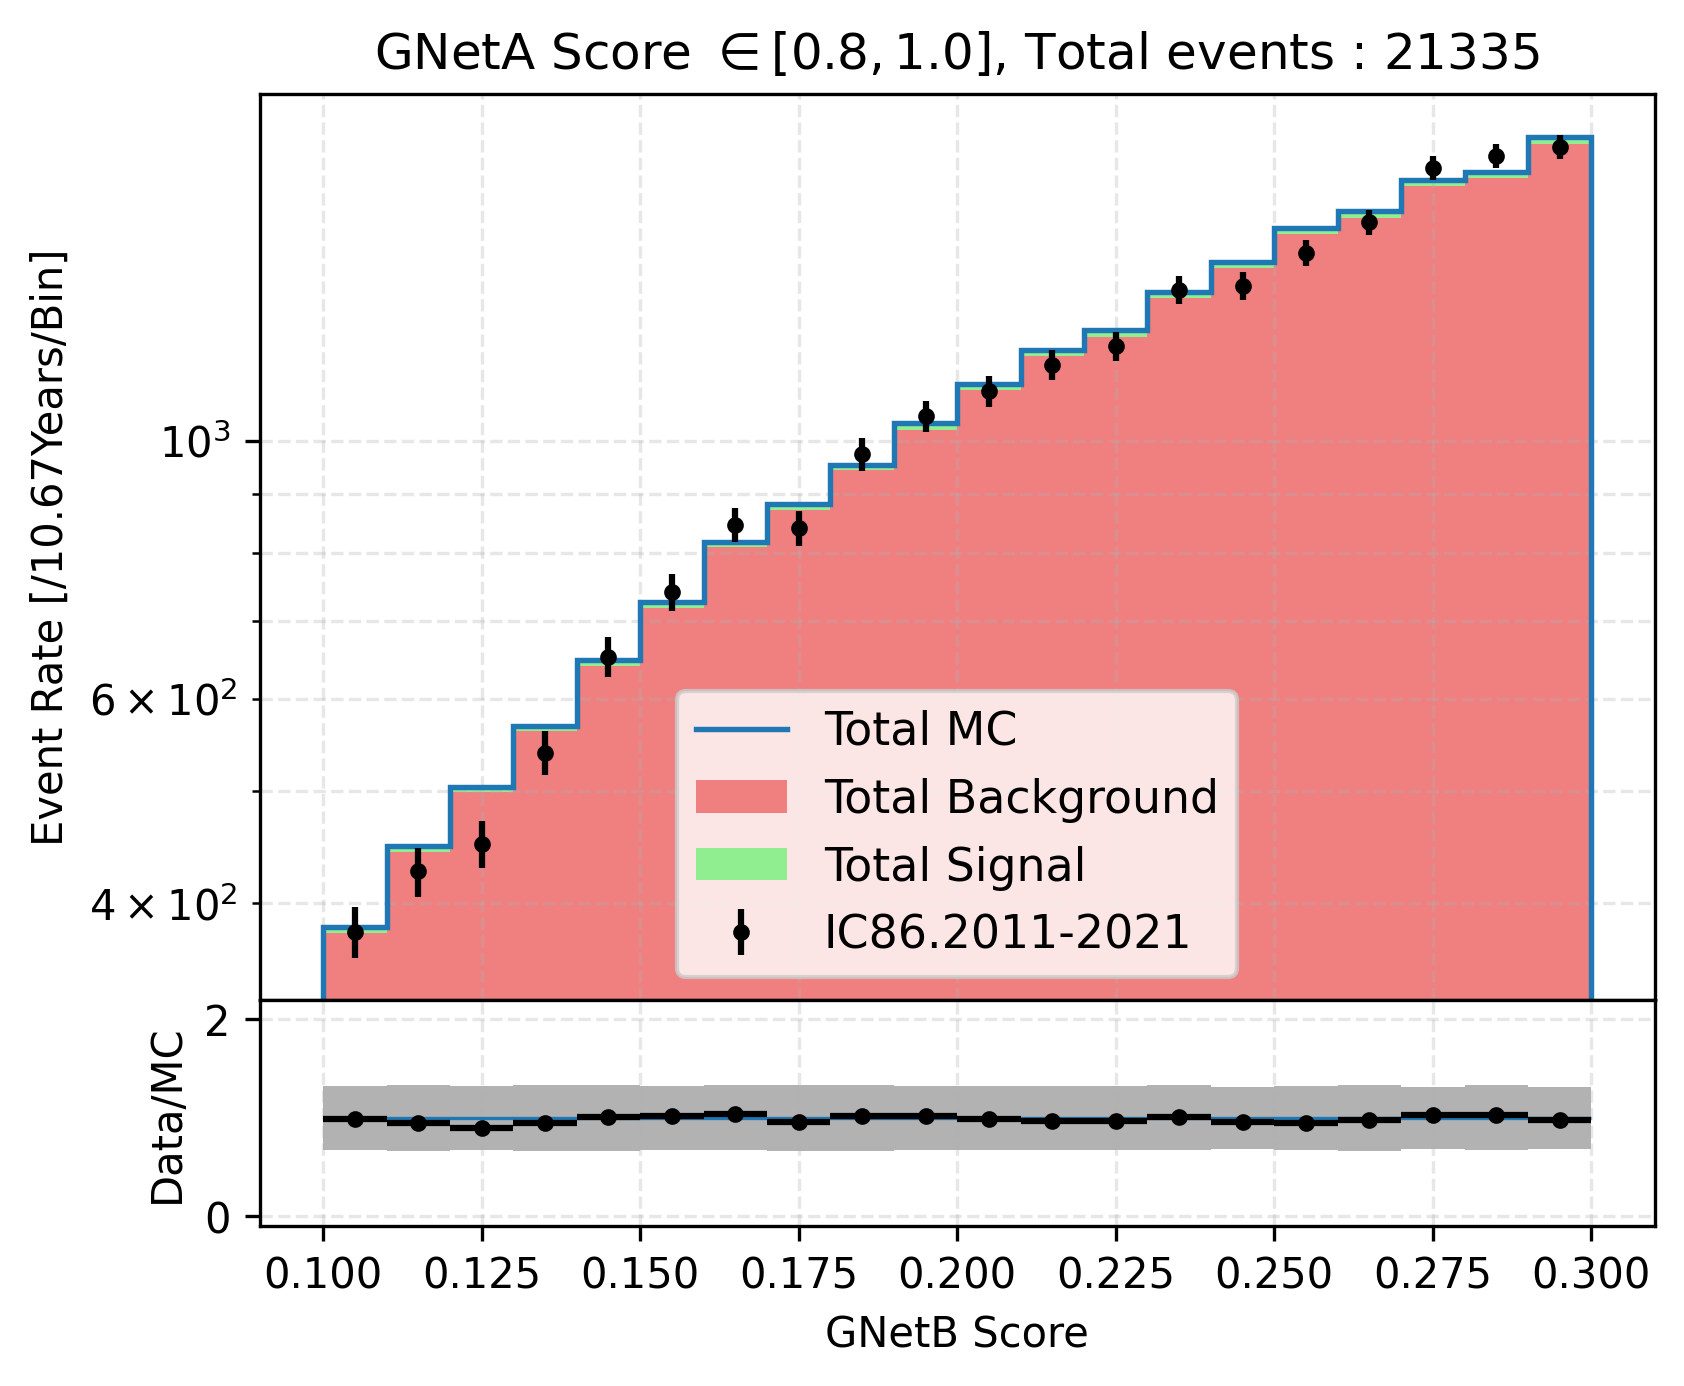

In [190]:
xmin=0.
xmax=1.
fig = plt.figure(figsize=(6,5))
gs = fig.add_gridspec(2, hspace=0, height_ratios=[4,1])
axs = gs.subplots(sharex=True)

#axs[0].fill_betweenx((1e-1,3e2),0.4, 1.0, color='tab:green', alpha=0.2, label='ROI')
#axs[1].fill_betweenx((-0.1,2.2),0.4, 1.0, color='tab:green', alpha=0.2)

axs[0].stairs(tot, bbins, label='Total MC',
          color='tab:blue', lw=1.3, zorder=2)
#axs[0].stairs(totup, bbins, baseline=totdn, fill=True, alpha=0.6, color='grey',
#                label=r'Total Sys. Unc. ($\pm 1\sigma$)')

axs[0].stairs(tot_bkg, bbins, baseline = np.zeros(len(tot_bkg)), fill=True, 
             label='Total Background', color='lightcoral' )

axs[0].stairs(tot_sig+tot_bkg, bbins, baseline = tot_bkg, fill=True, 
             label='Total Signal', color='lightgreen' )

axs[0].errorbar(bincen, ndata, yerr=nerr, fmt='k.', label='IC86.2011-2021', zorder=40)
#plot_hist(sig_holder[1], 'etrack', ebins, bincen, labels[5])

axs[0].grid(which='both', alpha=0.3, ls='--')
axs[0].legend(loc='lower center', fontsize=11)
axs[0].set_yscale('log')
axs[0].set_ylabel('Event Rate [/10.67Years/Bin]')
#axs[0].set_ylim([1e-1,3e2])

axs[1].stairs(totup/tot, bbins, baseline=totdn/tot, fill=True, alpha=0.6, color='grey')
axs[1].hlines(1, bmin,bmax, colors='tab:blue', linewidth=0.8)
axs[1].errorbar(bincen, ndata/tot, yerr=nerr/tot, xerr=bindiff,
                fmt='k.', zorder=40)

axs[1].set_ylim([0.,2])
axs[1].grid(which='both', alpha=0.3, ls='--')
axs[1].set_ylabel("Data/MC")
axs[1].set_xlabel(r'GNetB Score')
axs[1].set_ylim([-0.1,2.2])

#axs[0].set_title(f"LiveTime(s) : {time}, Total events : {np.sum(ndata)}")
axs[0].set_title(rf"GNetA Score $\in [0.8,1.0]$, Total events : {np.sum(ndata)}")

#plt.ylabel('Event Rate [per 0.76 Years per Bin]')
#plt.xlabel(r'$E_{proxy}$ (GeV)')
#plt.title("Burn Sample Comparison")
plt.show()

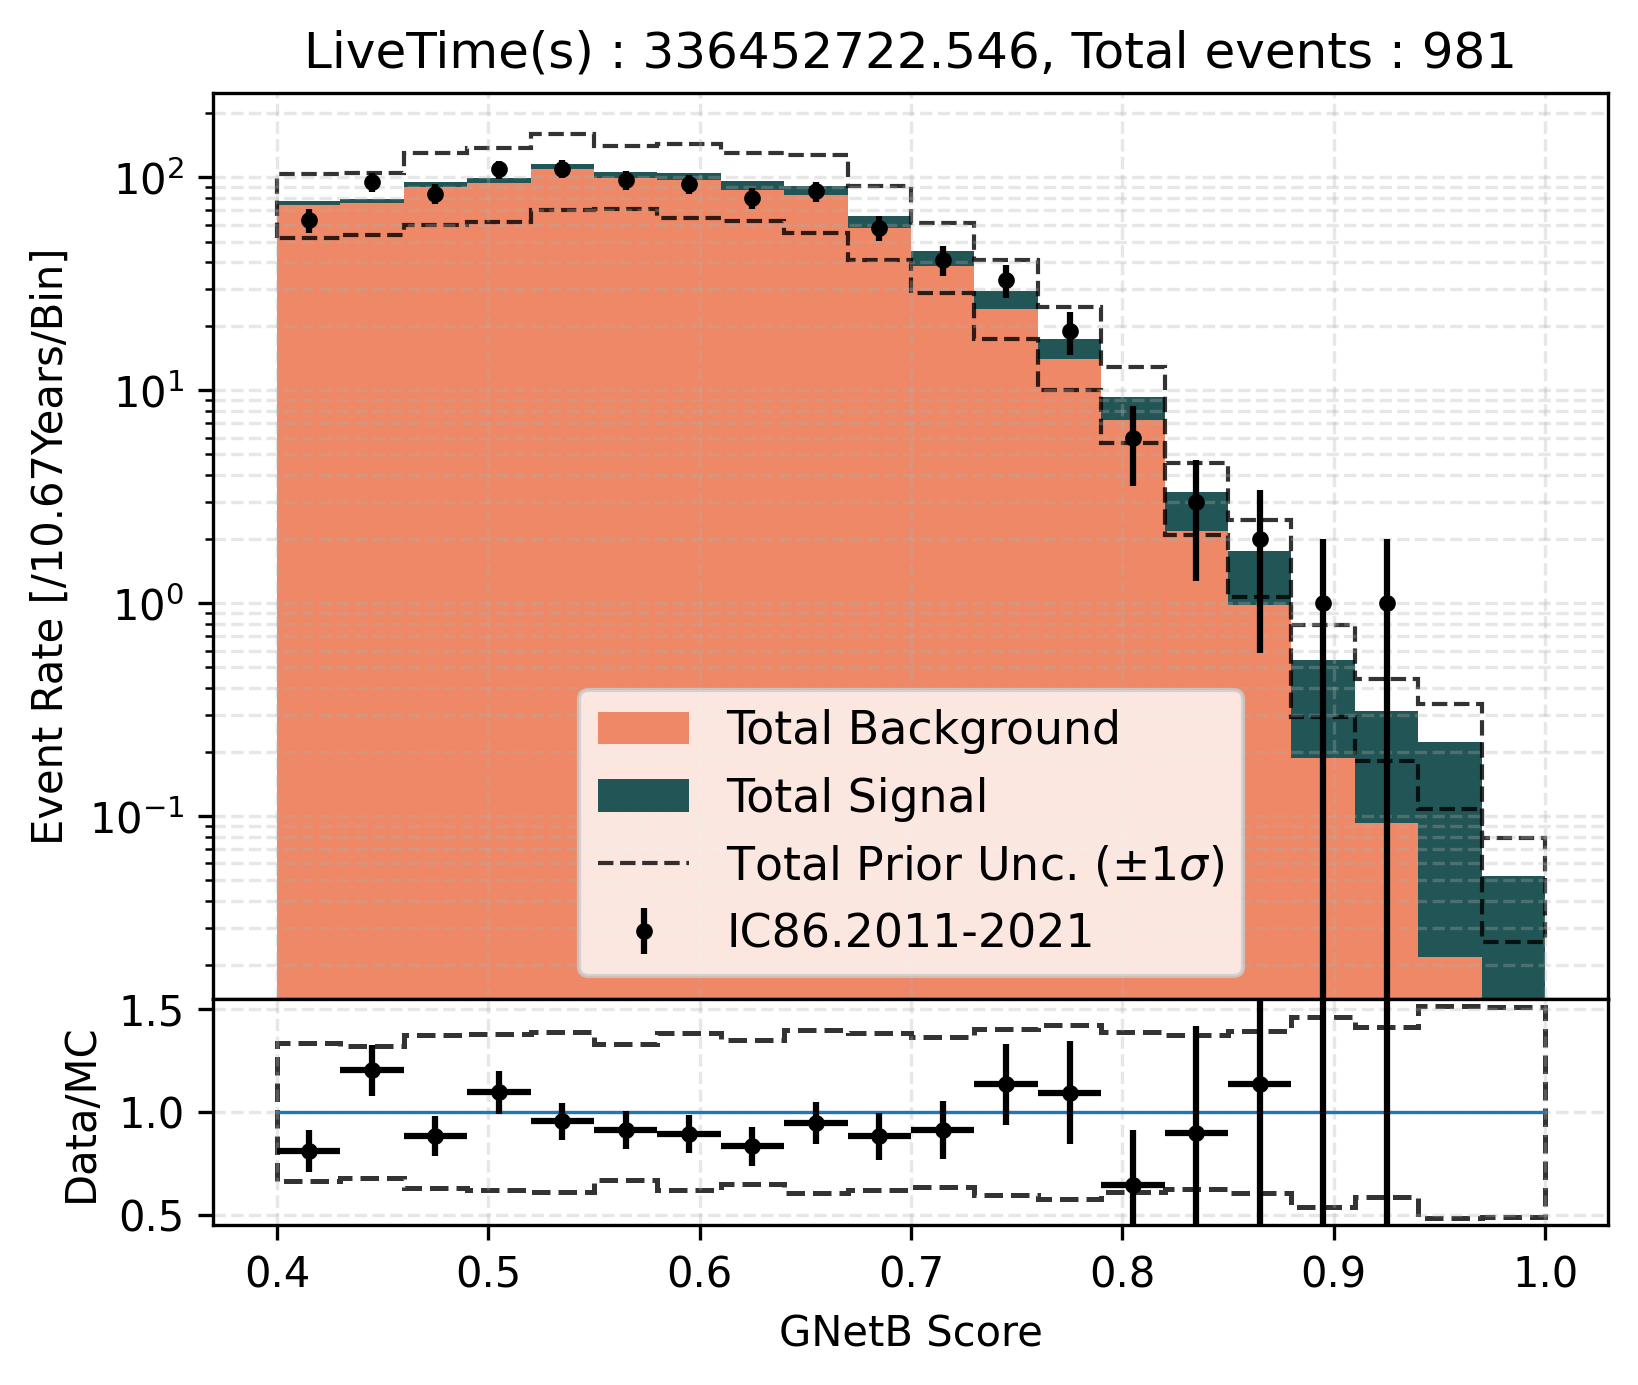

In [234]:
fig = plt.figure(figsize=(6,5))
gs = fig.add_gridspec(2, hspace=0, height_ratios=[4,1])
axs = gs.subplots(sharex=True)

#axs[0].fill_betweenx((1e-1,3e2),0.4, 1.0, color='tab:green', alpha=0.2, label='ROI')
#axs[1].fill_betweenx((-0.1,2.2),0.4, 1.0, color='tab:green', alpha=0.2)

#axs[0].stairs(tot, bbins, label='Total MC',
#          color='tab:blue', lw=1.3, zorder=2)
axs[0].stairs(tot_bkg, bbins, baseline = np.zeros(len(tot_bkg)), fill=True, 
             label='Total Background', color=bcolor )

axs[0].stairs(tot_sig+tot_bkg, bbins, baseline = tot_bkg, fill=True, 
             label='Total Signal', color=scolor )

axs[0].stairs(totup, bbins, baseline=totdn, fill=False,
              ls = "--", alpha=0.8, color='k',
                label=r'Total Prior Unc. ($\pm 1\sigma$)')

axs[0].errorbar(bincen, ndata, yerr=nerr, fmt='k.', label='IC86.2011-2021', zorder=40)
#plot_hist(sig_holder[1], 'etrack', ebins, bincen, labels[5])
axs[0].grid(which='both', alpha=0.3, ls='--')
axs[0].set_yscale('log')
axs[0].set_ylabel('Event Rate [/10.67Years/Bin]')
#--------------------- Region dependent stuff below
axs[0].legend(loc='lower center', fontsize=11)
#axs[0].set_ylim([1e-1,3e2])

#---------------------------------------------------
axs[1].stairs(totup/tot, bbins, baseline=totdn/tot, fill=False,
              ls = "--", lw=1.2, alpha=0.8, color='k')
axs[1].hlines(1, bmin,bmax, colors='tab:blue', linewidth=0.8)
axs[1].errorbar(bincen, ndata/tot, yerr=nerr/tot, xerr=bindiff,
                fmt='k.', zorder=40)
axs[1].grid(which='both', alpha=0.3, ls='--')
axs[1].set_ylabel("Data/MC")
axs[1].set_xlabel(r'GNetB Score')

#---------------------- Region dependent stuff below
axs[1].set_ylim([0.45,1.55])
#axs[1].set_ylim([-0.1,2.2])

axs[0].set_title(f"LiveTime(s) : {time}, Total events : {np.sum(ndata)}")
#axs[0].set_title(rf"GNetA Score $\in [0.8,1.0]$, Total events : {np.sum(ndata)}")

#plt.ylabel('Event Rate [per 0.76 Years per Bin]')
#plt.xlabel(r'$E_{proxy}$ (GeV)')
#plt.title("Burn Sample Comparison")
plt.show()

# Compute the sys error first

In [235]:
reg = config['CutRegions']['ROI']
for process in sig_holder:
    process.reset_cut()
    process.apply_energyCut()
    process.apply_zenithCut()
    process.apply_boxCut(reg[1][0], reg[1][1],
                       amax=reg[1][2], bmax=reg[1][3])

for process in bkg_holder:
    process.reset_cut()
    process.apply_energyCut()
    process.apply_zenithCut()
    process.apply_boxCut(reg[1][0], reg[1][1],
                       amax=reg[1][2], bmax=reg[1][3])

for process in sigsys_holder:
    process.reset_cut()
    process.apply_energyCut()
    process.apply_zenithCut()
    process.apply_boxCut(reg[1][0], reg[1][1],
                       amax=reg[1][2], bmax=reg[1][3])

for process in bkgsys_holder:
    process.reset_cut()
    process.apply_energyCut()
    process.apply_zenithCut()
    process.apply_boxCut(reg[1][0], reg[1][1],
                       amax=reg[1][2], bmax=reg[1][3])


nbins = 10
ebins = np.logspace(np.log10(1.1e3),np.log10(5e4),nbins+1)
nbins = 4
zbins = np.linspace(-1,0,nbins+1)

#abins = np.linspace(0,1,nbins+1)
#bbins = np.linspace(0,1,nbins+1)
nbins = 4

abins = np.linspace(0.8,1,nbins+1)
nbins = 4
bbins = np.linspace(0.5,1,nbins+1)

sigerr = get_totunc_charm(ebins, zbins, abins, bbins)
bkgerr = get_totunc_ccdis(ebins, zbins, abins, bbins)

senerr = get_tot(sigerr[0])
sznerr = get_tot(sigerr[1])
saperr = get_tot(sigerr[2])
sbperr = get_tot(sigerr[3])

benerr = get_tot1(bkgerr[0])
bznerr = get_tot1(bkgerr[1])
baperr = get_tot1(bkgerr[2])
bbperr = get_tot1(bkgerr[3])

# SR1/SR2

In [258]:
reg = config['CutRegions']['SR2']
for process in sig_holder:
    process.reset_cut()
    process.apply_energyCut()
    process.apply_zenithCut()
    process.apply_curveCut(reg[1][0], reg[1][1],
                       reg[0])

for process in bkg_holder:
    process.reset_cut()
    process.apply_energyCut()
    process.apply_zenithCut()
    process.apply_curveCut(reg[1][0], reg[1][1],
                       reg[0])

for process in sigsys_holder:
    process.reset_cut()
    process.apply_energyCut()
    process.apply_zenithCut()
    process.apply_curveCut(reg[1][0], reg[1][1],
                       reg[0])

for process in bkgsys_holder:
    process.reset_cut()
    process.apply_energyCut()
    process.apply_zenithCut()
    process.apply_curveCut(reg[1][0], reg[1][1],
                       reg[0])


data.reset_cut()
data.apply_energyCut()
data.apply_zenithCut()
data.apply_curveCut(reg[1][0], reg[1][1],
                       reg[0])


In [259]:
nbins = 10
ebins = np.logspace(np.log10(1.1e3),np.log10(5e4),nbins+1)
nbins = 4
zbins = np.linspace(-1,0,nbins+1)

#abins = np.linspace(0,1,nbins+1)
#bbins = np.linspace(0,1,nbins+1)
nbins = 4

abins = np.linspace(0.8,1,nbins+1)
nbins = 4
bbins = np.linspace(0.5,1,nbins+1)

In [260]:
sigerr = get_totunc_charm(ebins, zbins, abins, bbins)
bkgerr = get_totunc_ccdis(ebins, zbins, abins, bbins)

senerr = get_tot(sigerr[0])
sznerr = get_tot(sigerr[1])
saperr = get_tot(sigerr[2])
sbperr = get_tot(sigerr[3])

benerr = get_tot1(bkgerr[0])
bznerr = get_tot1(bkgerr[1])
baperr = get_tot1(bkgerr[2])
bbperr = get_tot1(bkgerr[3])

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.1/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.1/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.1/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.1/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.1/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.1/RHEL_7_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value 

In [261]:
bincen = 0.5*(ebins[1:]+ebins[:-1])

bindiff = np.diff(ebins)/2.

b1 = get_hist(bkg_holder[0], 'etrack', ebins)
b2 = get_hist(bkg_holder[1], 'etrack', ebins)
b3 = get_hist(bkg_holder[2], 'etrack', ebins)
b4 = get_hist(bkg_holder[3], 'etrack', ebins)

s1 = get_hist(sig_holder[0], 'etrack', ebins)
s2 = get_hist(sig_holder[1], 'etrack', ebins)

totsig = s1+s2
totbkg = b1+b2+b3+b4

totsigup = totsig+s1*senerr
totsigdn = totsig-s1*senerr

totbkgup = totbkg+b1*benerr
totbkgdn = totbkg-b1*benerr

#ndata,_ = np.histogram(data.event_arr[data.event_idx]['etrack'], bins=ebins)
#nerr = np.sqrt(ndata)


In [262]:
totbkg

array([1.28323338, 0.66786185, 0.17986222, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [263]:
b1

array([1.28323338, 0.66786185, 0.17986222, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [264]:
benerr*b1

array([2.64565903, 0.40398924, 0.26239065,        nan,        nan,
              nan,        nan,        nan,        nan,        nan])

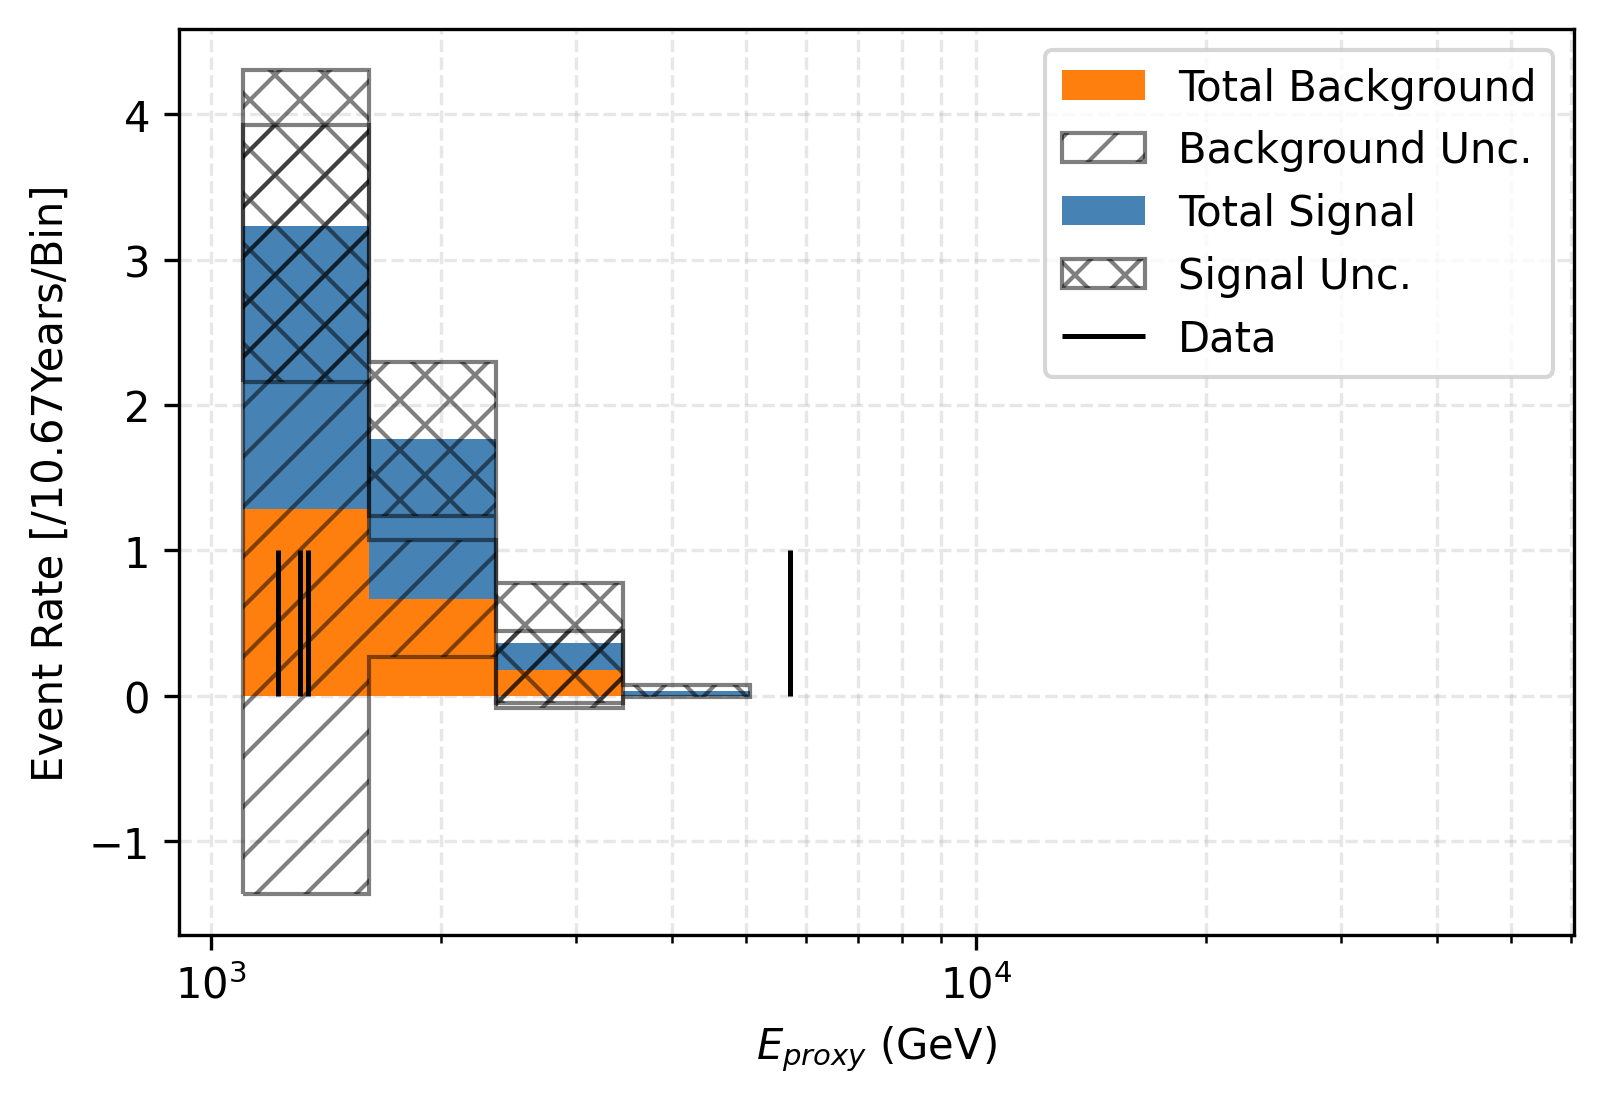

In [265]:
baseline = np.zeros(len(totbkg))

plt.figure()

plt.stairs(totbkg, ebins, baseline=baseline, fill=True,# hatch='//',
           label='Total Background',
          color='tab:orange', lw=1.3, zorder=2)
plt.stairs(totbkgup, ebins, baseline=totbkgdn, hatch='//', color='k',
           alpha=0.5, zorder=40, label='Background Unc.')


plt.stairs(totbkg+totsig, ebins, baseline=totbkg, fill=True,# hatch='xx',
           label='Total Signal',
          color='steelblue', lw=1.3, zorder=2)


#errors
plt.stairs(totsigup+totbkg, ebins, baseline=totsigdn+totbkg, hatch='xx', color='k',
           alpha=0.5,zorder=41, label="Signal Unc.")
plt.grid(which='both', alpha=0.3, ls='--')
for d in data.event_arr[data.event_idx]['etrack']:
    if d<2e3:
        plt.vlines(d, 0,1, colors='k', linewidth=1.2, zorder=60)
    else:
        plt.vlines(d, 0,1, colors='k', linewidth=1.2, label="Data", zorder=60)
#plt.vlines(d, 0,1, colors='k', linewidth=1.2, label='Data')
plt.xscale('log')
plt.xlabel(r'$E_{proxy}$ (GeV)')
plt.ylabel('Event Rate [/10.67Years/Bin]')
plt.legend()
plt.show()

In [246]:
bincen = 0.5*(zbins[1:]+zbins[:-1])

prop = 'cosz'

bindiff = np.diff(zbins)/2.

b1 = get_hist(bkg_holder[0], prop, zbins)
b2 = get_hist(bkg_holder[1], prop, zbins)
b3 = get_hist(bkg_holder[2], prop, zbins)
b4 = get_hist(bkg_holder[3], prop, zbins)

s1 = get_hist(sig_holder[0], prop, zbins)
s2 = get_hist(sig_holder[1], prop, zbins)

totsig = s1+s2
totbkg = b1+b2+b3+b4

totsigup = totsig+s1*sznerr
totsigdn = totsig-s1*sznerr

totbkgup = totbkg+b1*bznerr
totbkgdn = totbkg-b1*bznerr

#ndata,_ = np.histogram(data.event_arr[data.event_idx][prop], bins=zbins)
#nerr = np.sqrt(ndata)


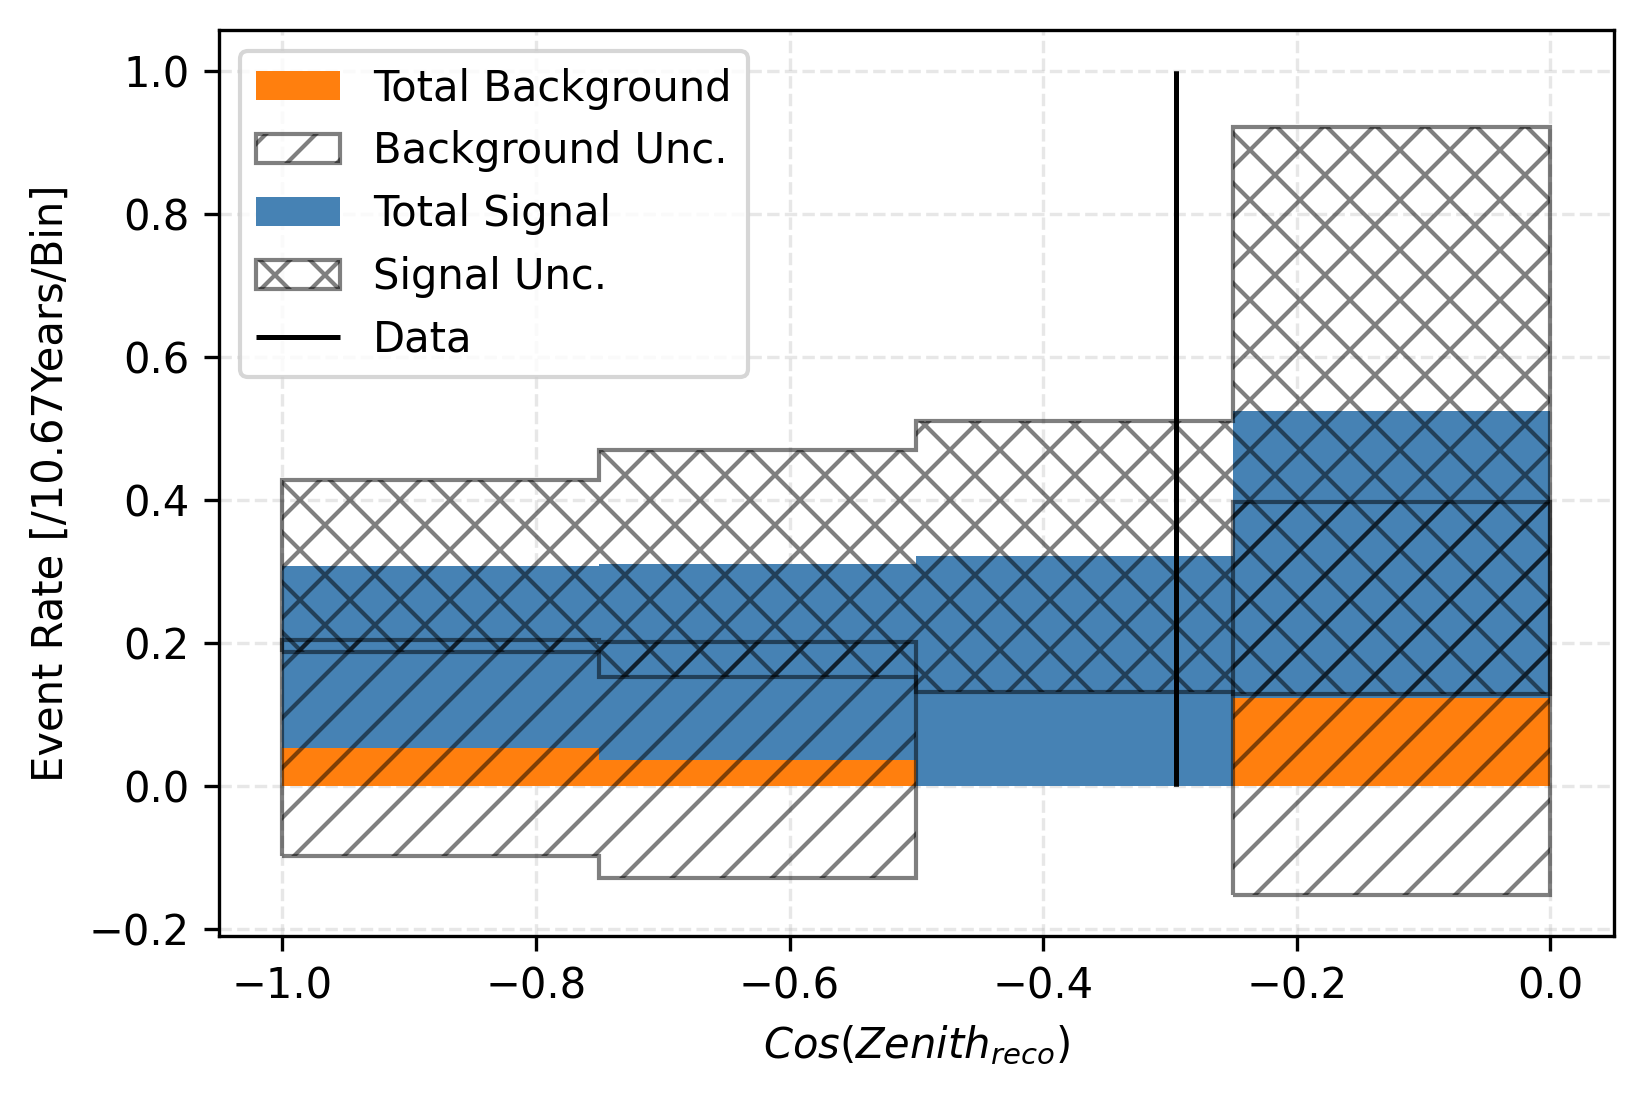

In [247]:
baseline = np.zeros(len(totbkg))
plt.figure()
plt.stairs(totbkg, zbins, baseline=baseline, fill=True,# hatch='//',
           label='Total Background',
          color='tab:orange', lw=1.3, zorder=2)
plt.stairs(totbkgup, zbins, baseline=totbkgdn, hatch='//', color='k',
           alpha=0.5, zorder=40, label='Background Unc.')


plt.stairs(totbkg+totsig, zbins, baseline=totbkg, fill=True,# hatch='xx',
           label='Total Signal',
          color='steelblue', lw=1.3, zorder=2)


#errors
plt.stairs(totsigup+totbkg, zbins, baseline=totsigdn+totbkg, hatch='xx', color='k',
           alpha=0.5,zorder=41, label="Signal Unc.")
plt.grid(which='both', alpha=0.3, ls='--')
for d in data.event_arr[data.event_idx][prop]:
    if d>-0.2:
        plt.vlines(d, 0,1, colors='k', linewidth=1.2, zorder=60)
    else:
        plt.vlines(d, 0,1, colors='k', linewidth=1.2, zorder=60)
plt.vlines(d, 0,1, colors='k', linewidth=1.2, label="Data", zorder=60)


#plt.stairs(totsig, zbins, label='Total Signal',
#          color='tab:blue', lw=1.3, zorder=2)
#plt.stairs(totbkg, zbins, label='Total Background',
#          color='tab:orange', lw=1.3, zorder=2)
#plt.grid(which='both', alpha=0.3, ls='--')
#for d in data.event_arr[data.event_idx]['cosz']:
#    plt.vlines(d, 0,1, colors='k', linewidth=1)

#plt.vlines(d, 0,0.4, colors='k', linewidth=1, label='Data')

plt.xlabel(r'$Cos(Zenith_{reco})$')
plt.ylabel('Event Rate [/10.67Years/Bin]')
plt.legend(loc='upper left')
plt.show()

In [226]:
bincen = 0.5*(abins[1:]+abins[:-1])

prop = 'apred'

bindiff = np.diff(abins)/2.

b1 = get_hist(bkg_holder[0], prop, abins)
b2 = get_hist(bkg_holder[1], prop, abins)
b3 = get_hist(bkg_holder[2], prop, abins)
b4 = get_hist(bkg_holder[3], prop, abins)

s1 = get_hist(sig_holder[0], prop, abins)
s2 = get_hist(sig_holder[1], prop, abins)

totsig = s1+s2
totbkg = b1+b2+b3+b4


totsigup = totsig+s1*saperr
totsigdn = totsig-s1*saperr

totbkgup = totbkg+b1*baperr
totbkgdn = totbkg-b1*baperr

#ndata,_ = np.histogram(data.event_arr[data.event_idx][prop], bins=abins)
#nerr = np.sqrt(ndata)


In [204]:
s1

array([0.        , 0.02659472, 0.16982061, 3.05035559])

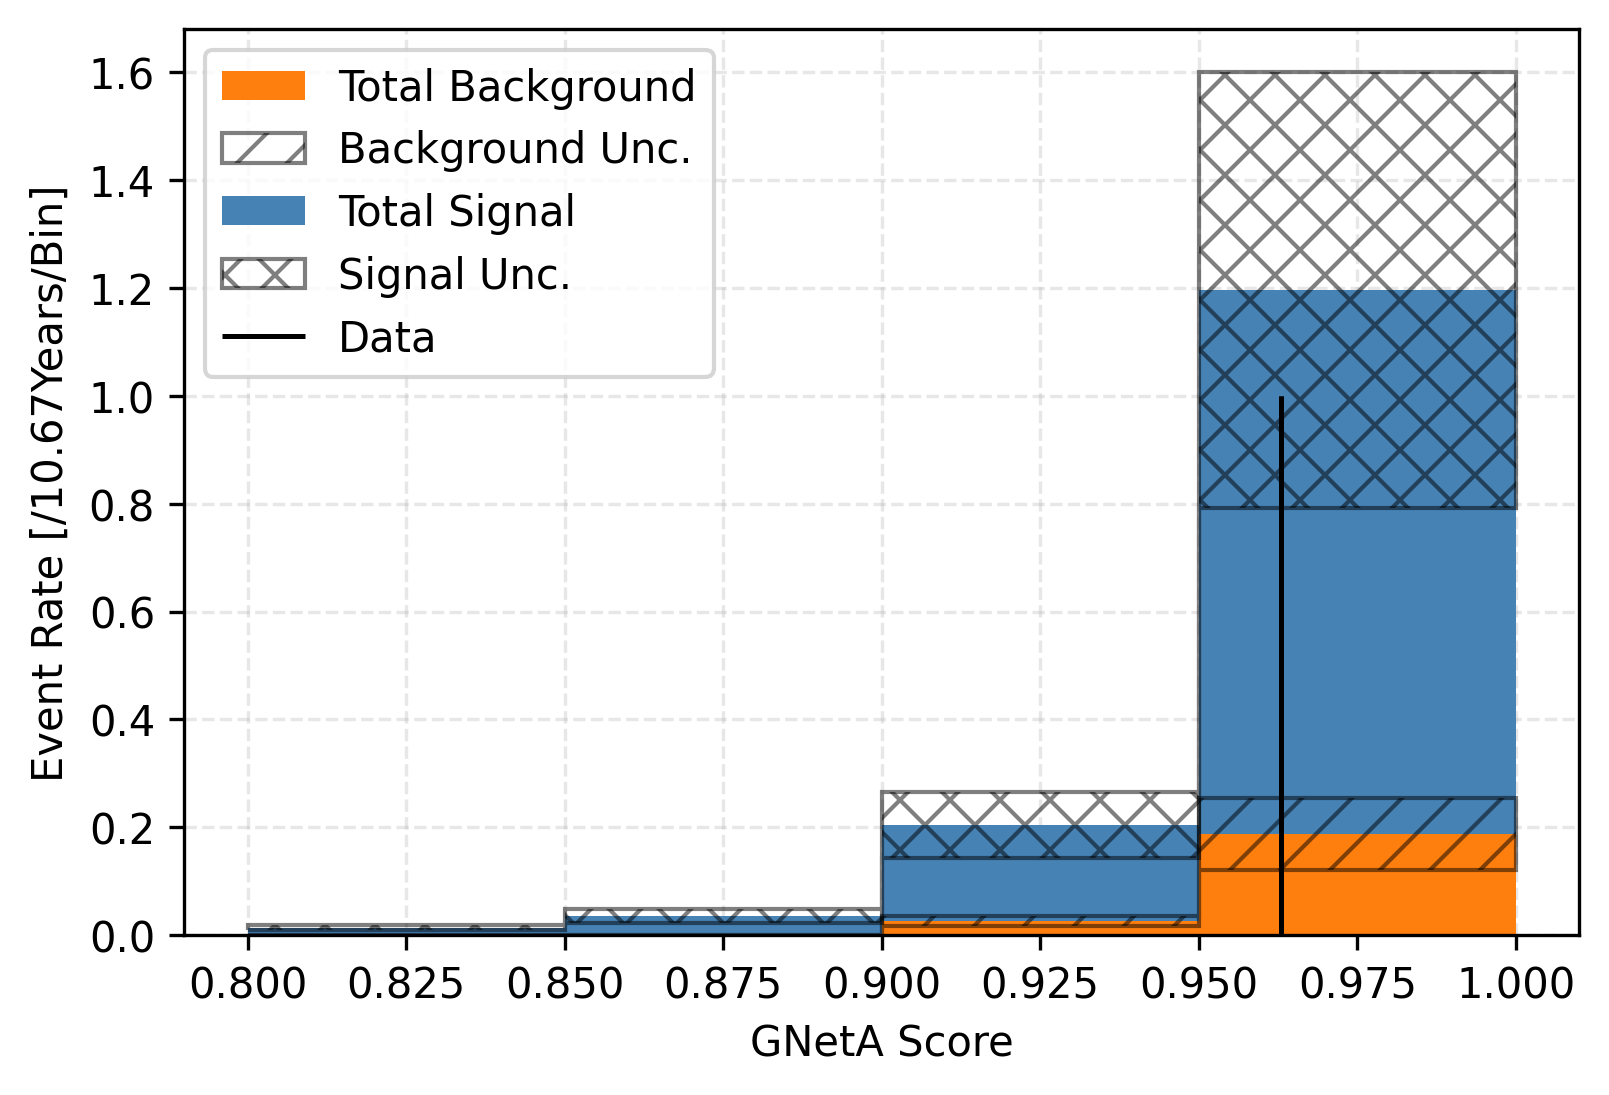

In [227]:
baseline = np.zeros(len(totbkg))
plt.figure()
plt.stairs(totbkg, abins, baseline=baseline, fill=True,# hatch='//',
           label='Total Background',
          color='tab:orange', lw=1.3, zorder=2)
plt.stairs(totbkgup, abins, baseline=totbkgdn, hatch='//', color='k',
           alpha=0.5, zorder=40, label='Background Unc.')


plt.stairs(totbkg+totsig, abins, baseline=totbkg, fill=True,# hatch='xx',
           label='Total Signal',
          color='steelblue', lw=1.3, zorder=2)


#errors
plt.stairs(totsigup+totbkg, abins, baseline=totsigdn+totbkg, hatch='xx', color='k',
           alpha=0.5,zorder=41, label="Signal Unc.")
plt.grid(which='both', alpha=0.3, ls='--')
for d in data.event_arr[data.event_idx][prop]:
    if d>0.95:
        plt.vlines(d, 0,1, colors='k', linewidth=1.2, zorder=60)
    else:
        plt.vlines(d, 0,1, colors='k', linewidth=1.2, zorder=60)
plt.vlines(d, 0,1, colors='k', linewidth=1.2, label="Data", zorder=60)
plt.xlabel(r'GNetA Score')
plt.ylabel('Event Rate [/10.67Years/Bin]')
plt.legend(loc='upper left')
plt.show()

In [228]:
bincen = 0.5*(bbins[1:]+bbins[:-1])

prop = 'bpred'

bindiff = np.diff(bbins)/2.

b1 = get_hist(bkg_holder[0], prop, bbins)
b2 = get_hist(bkg_holder[1], prop, bbins)
b3 = get_hist(bkg_holder[2], prop, bbins)
b4 = get_hist(bkg_holder[3], prop, bbins)

s1 = get_hist(sig_holder[0], prop, bbins)
s2 = get_hist(sig_holder[1], prop, bbins)

totsig = s1+s2
totbkg = b1+b2+b3+b4


totsigup = totsig+s1*sbperr
totsigdn = totsig-s1*sbperr

totbkgup = totbkg+b1*bbperr
totbkgdn = totbkg-b1*bbperr

#ndata,_ = np.histogram(data.event_arr[data.event_idx][prop], bins=bbins)
#nerr = np.sqrt(ndata)


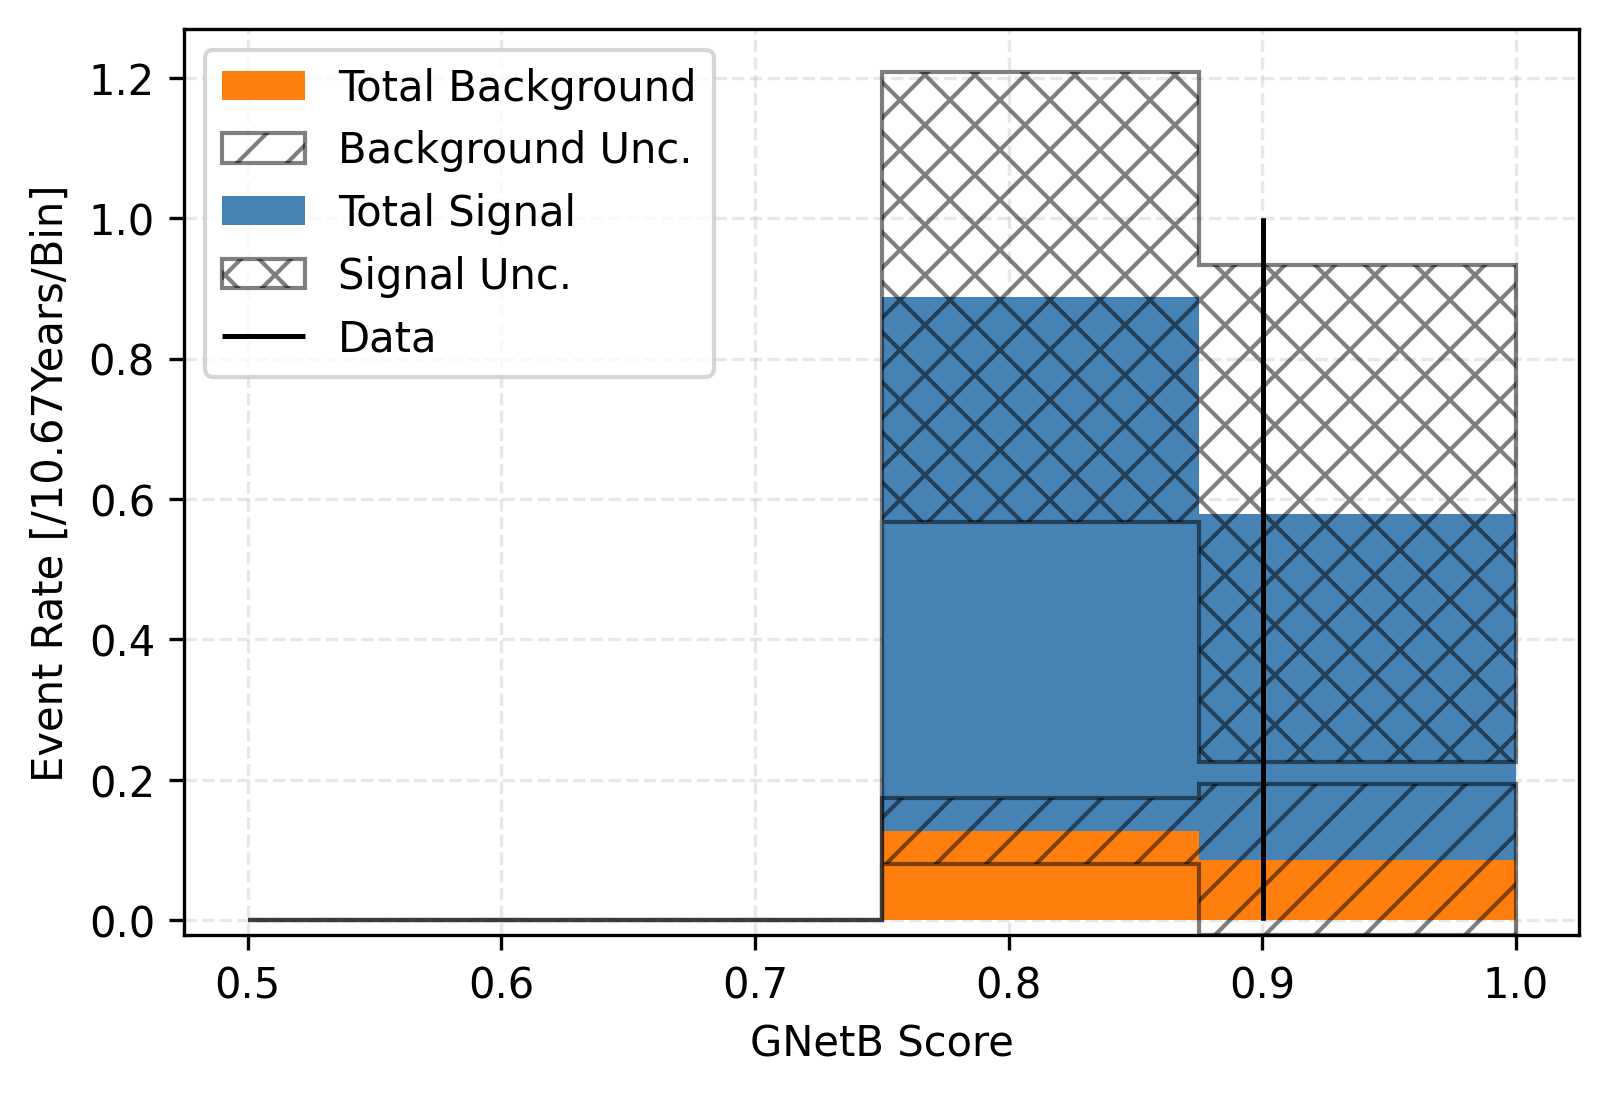

In [229]:
baseline = np.zeros(len(totbkg))
plt.figure()
plt.stairs(totbkg, bbins, baseline=baseline, fill=True,# hatch='//',
           label='Total Background',
          color='tab:orange', lw=1.3, zorder=2)
plt.stairs(totbkgup, bbins, baseline=totbkgdn, hatch='//', color='k',
           alpha=0.5, zorder=40, label='Background Unc.')


plt.stairs(totbkg+totsig, bbins, baseline=totbkg, fill=True,# hatch='xx',
           label='Total Signal',
          color='steelblue', lw=1.3, zorder=2)


#errors
plt.stairs(totsigup+totbkg, bbins, baseline=totsigdn+totbkg, hatch='xx', color='k',
           alpha=0.5,zorder=41, label="Signal Unc.")
plt.grid(which='both', alpha=0.3, ls='--')
for d in data.event_arr[data.event_idx][prop]:
    if d>0.95:
        plt.vlines(d, 0,1, colors='k', linewidth=1.2, zorder=60)
    else:
        plt.vlines(d, 0,1, colors='k', linewidth=1.2, zorder=60)
plt.vlines(d, 0,1, colors='k', linewidth=1.2, label="Data", zorder=60)

plt.xlabel(r'GNetB Score')
plt.ylabel('Event Rate [/10.67Years/Bin]')
plt.legend(loc='upper left')
plt.show()